#**Optical Character Recognition (OCR)**
OCR is a technique of reading or grabbing text from printed, scanned photos, pdf, handwritten images and convert them into a digital format which is readable, editable and searchable data.


Python-tesseract is an optical character recognition (OCR) tool for python. That is, it will recognize and "read" the text embedded in images.


In [2]:
#mount drive
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# **Install requirments**

Python-tesseract is a wrapper for Google's Tesseract-OCR Engine.It is an optical character recognition (OCR) tool for python. That is, it will recognize and "read" the text embedded in images.

In [3]:
!sudo apt install tesseract-ocr  #install Tesseract 
!pip install pytesseract         # install pytesseract from python
!apt-get install poppler-utils   #working related to pdf
!pip install pdf2image           #convert pdf to images

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,825 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (1,026 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 156257 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


#At first Converting pdf to PIL image

In [1]:
from pdf2image import convert_from_path

images = convert_from_path('/drive/My Drive/ML Project /OCR/Short Term Rental Vehicle Order Form.pdf')
                                 #Read data pdf with path location step by step path location from My Drive')
type(images) 

list

In [2]:
images # note images means all the pages of the pdf as an images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0x7F5851875B50>]

 From above we see that image store in list and PIL is the Python Imaging Library which provides the python interpreter with image editing capabilities. 

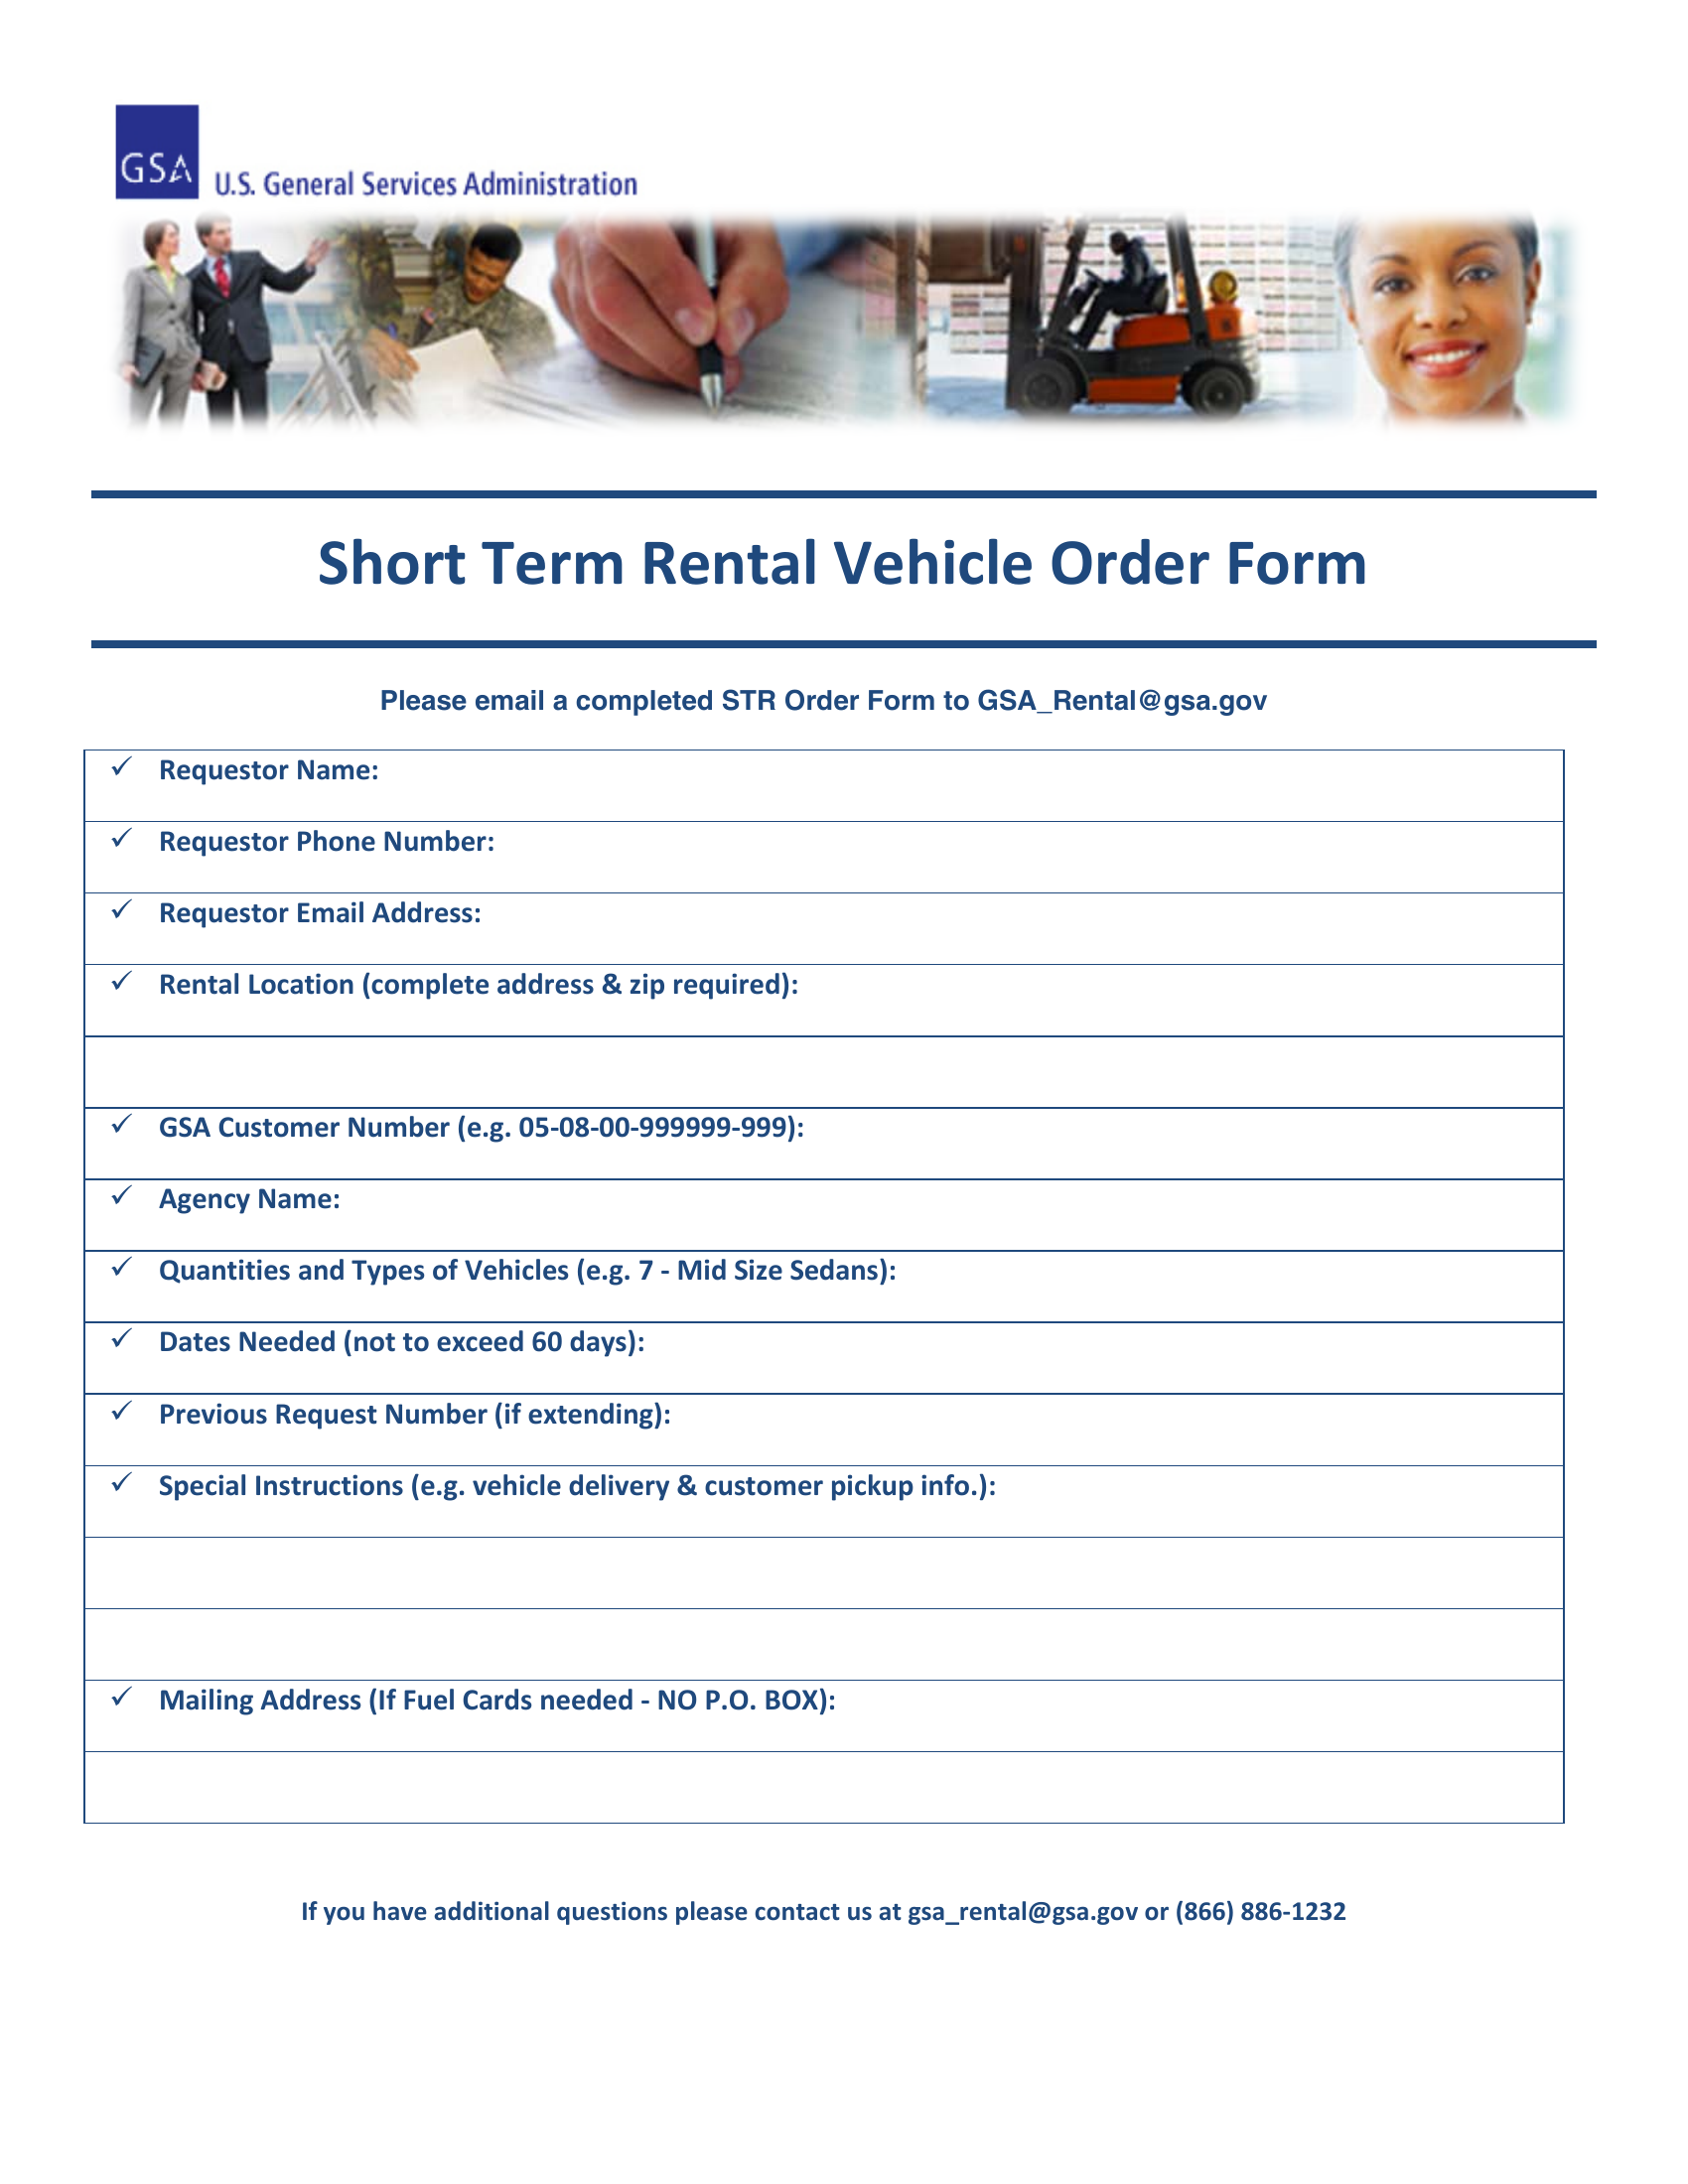

In [3]:
images[0] #show image with Indexing

# Convert pil image into numpy array

In [4]:
import numpy as np
from google.colab.patches import cv2_imshow  #open cv patches from google colab.
numpy_image = np.array(images[0]) 
print(numpy_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Dimensions of image is 3 ,In RGB format.

In [5]:
numpy_image.shape

(2200, 1700, 3)

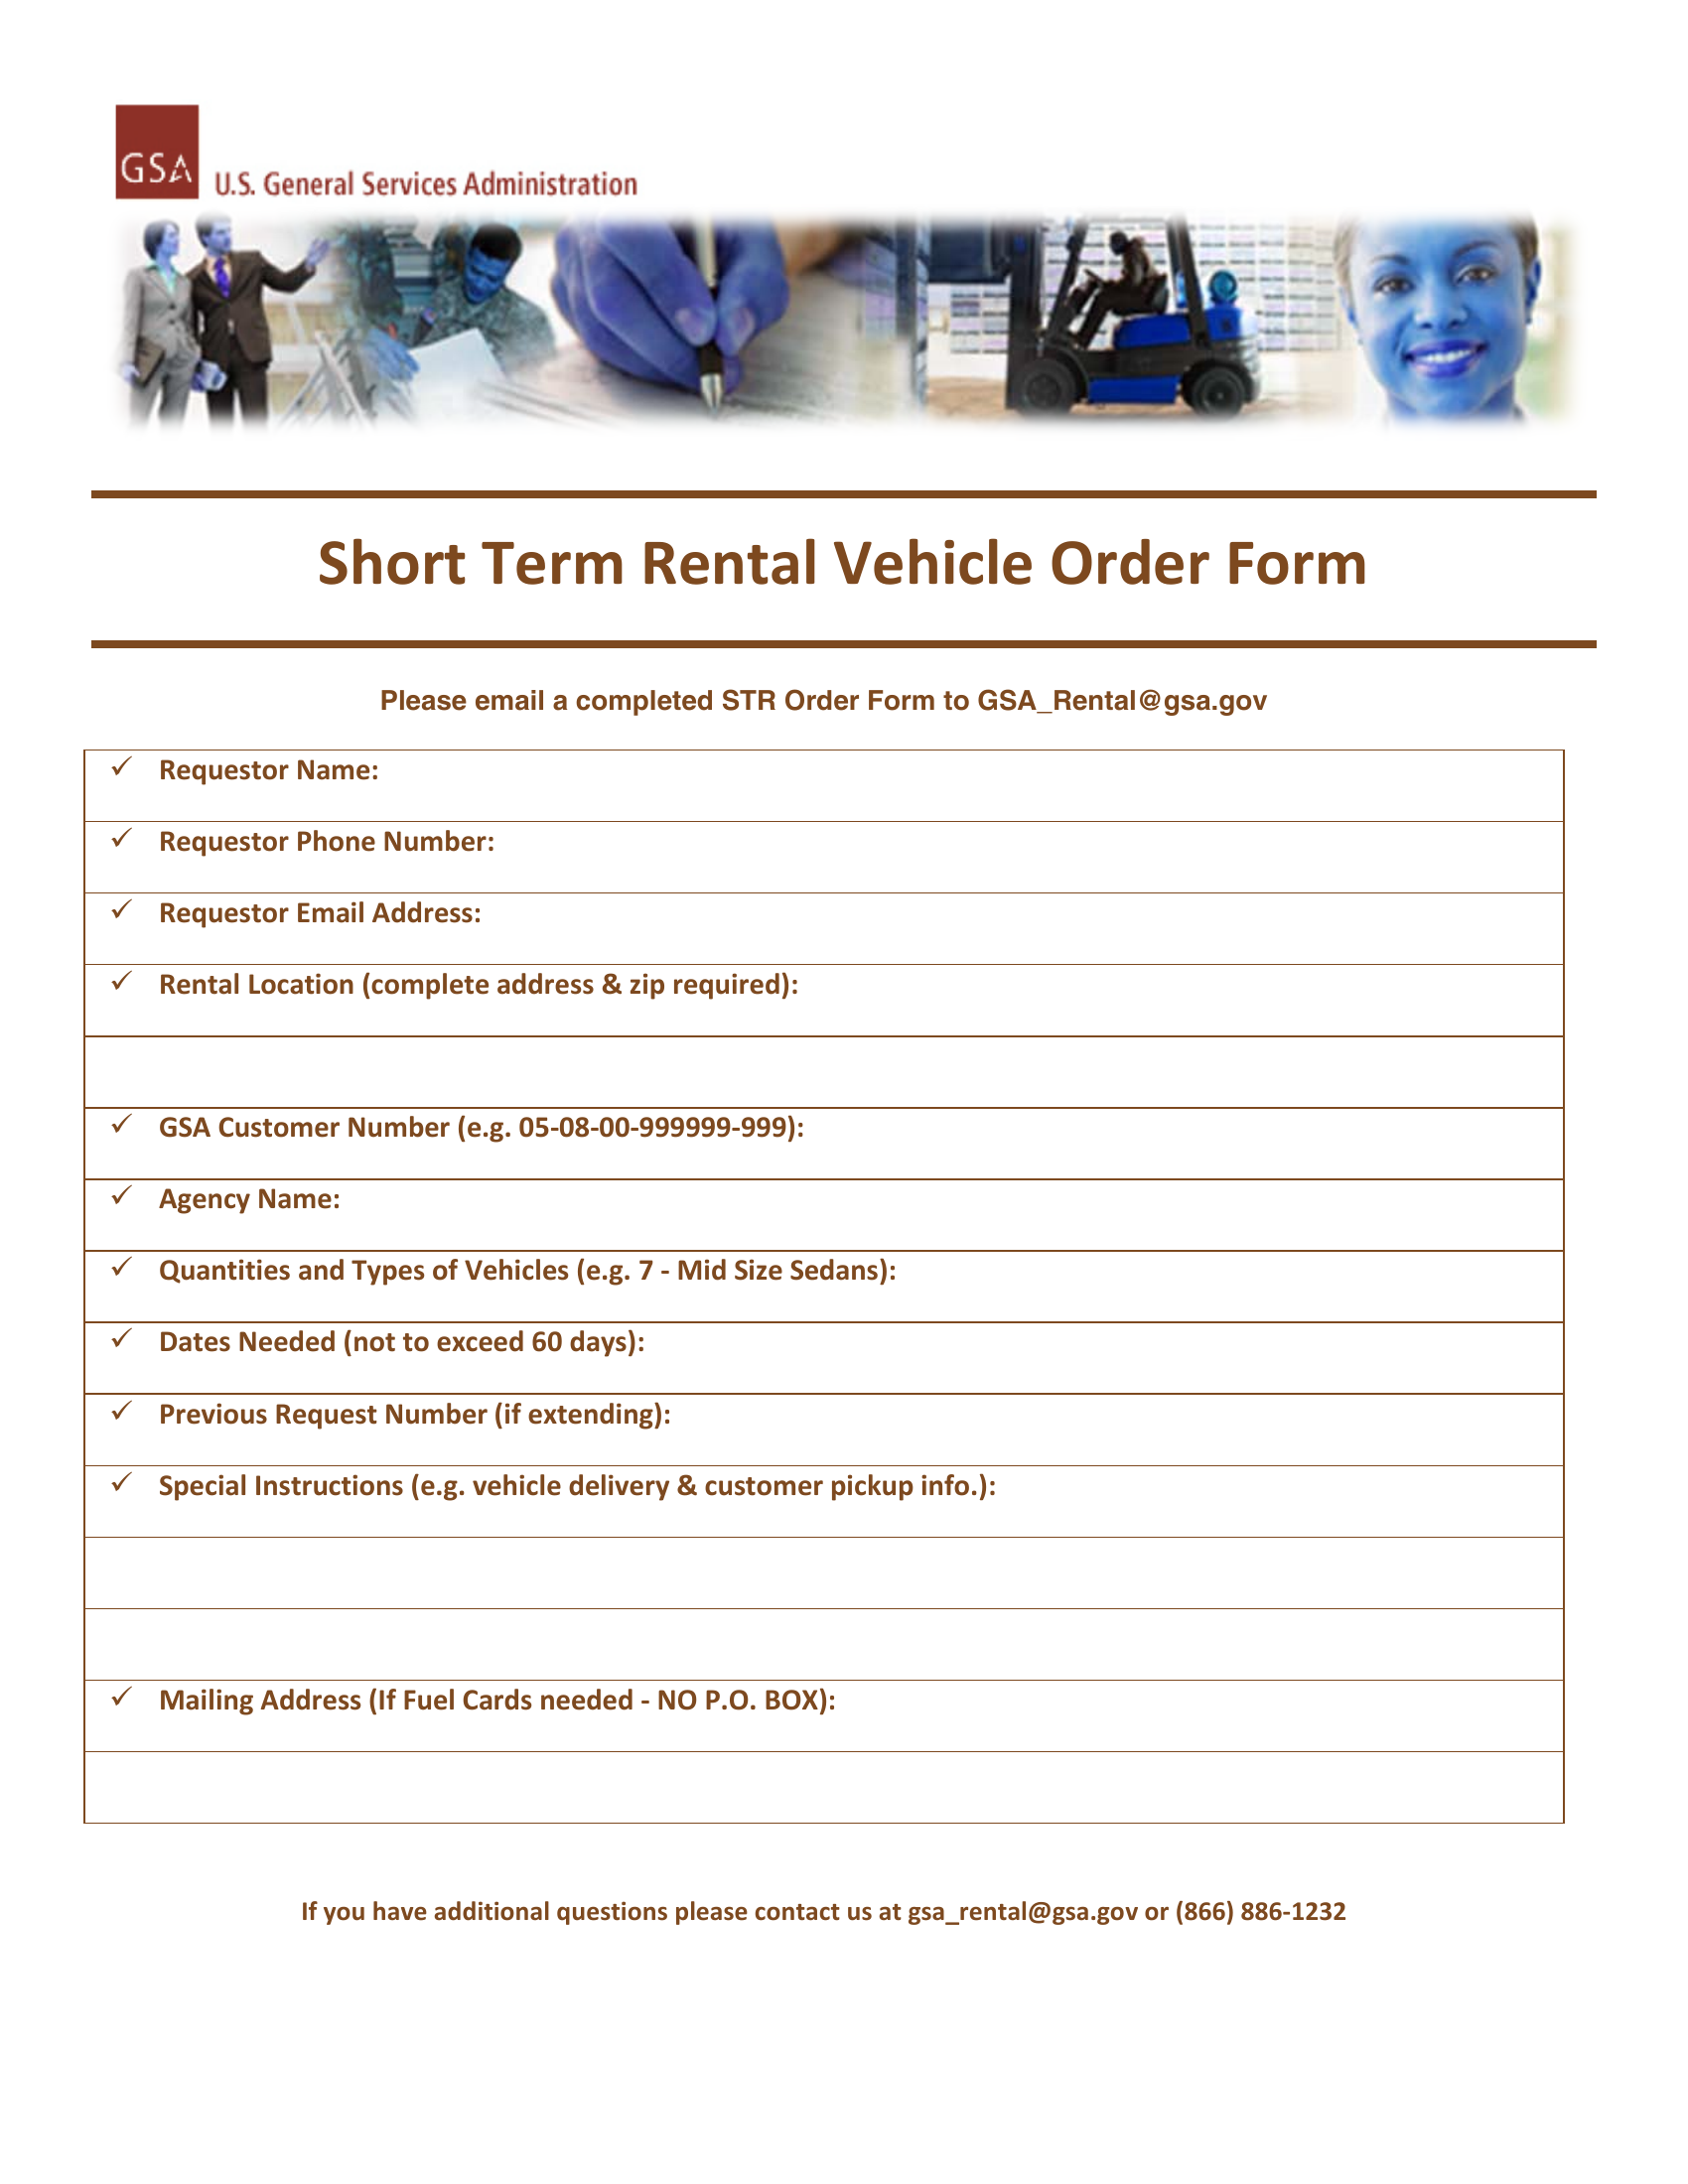

In [6]:
cv2_imshow(numpy_image)


# Changing colorspace

In [7]:
import cv2
imgray = cv2.cvtColor(numpy_image,cv2.COLOR_BGR2GRAY) # BGR to GRAY
print(imgray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Now image is converted in 2 dimension space.

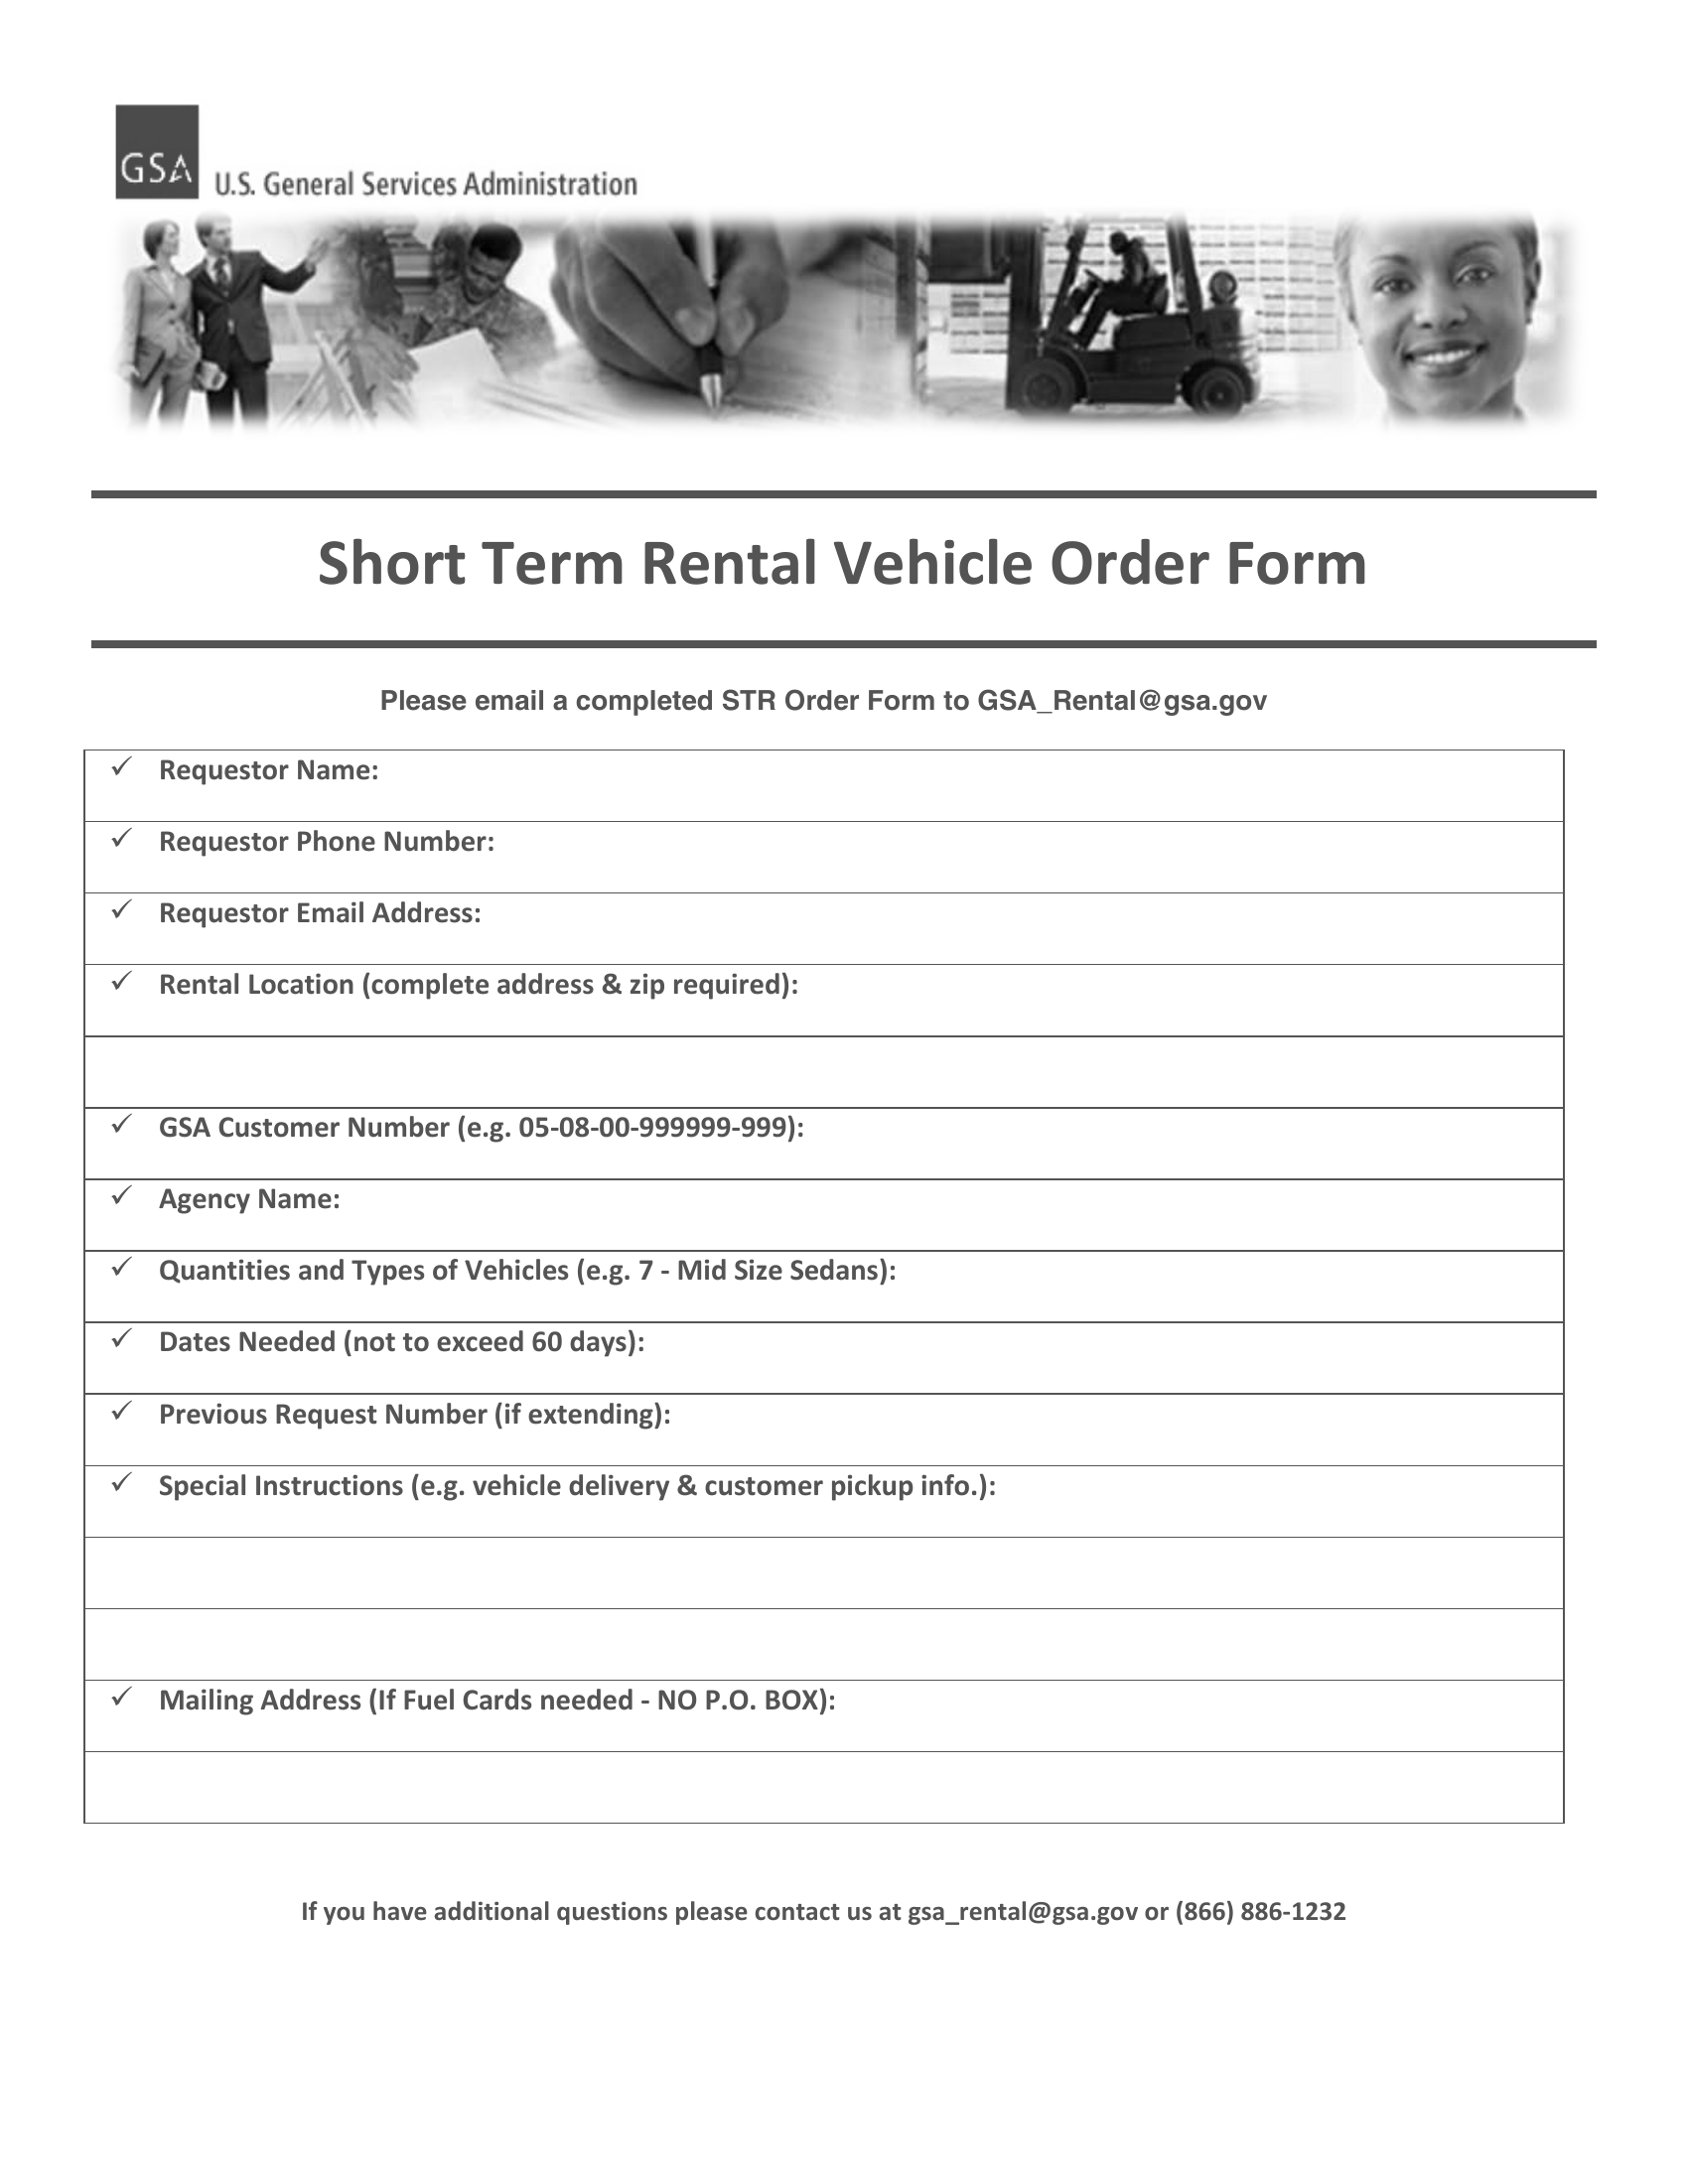

In [8]:
cv2_imshow(imgray)


# Threasholding (The source image for threasholding is gray image)

* Threasholdng is global threasholding
* Adaptive Thresholding : is for local threasholding

* IF we set threashholding then the gray imge is converted into whit and black as per thereshhold setup.

* Black and white image with value of 1 or 0.

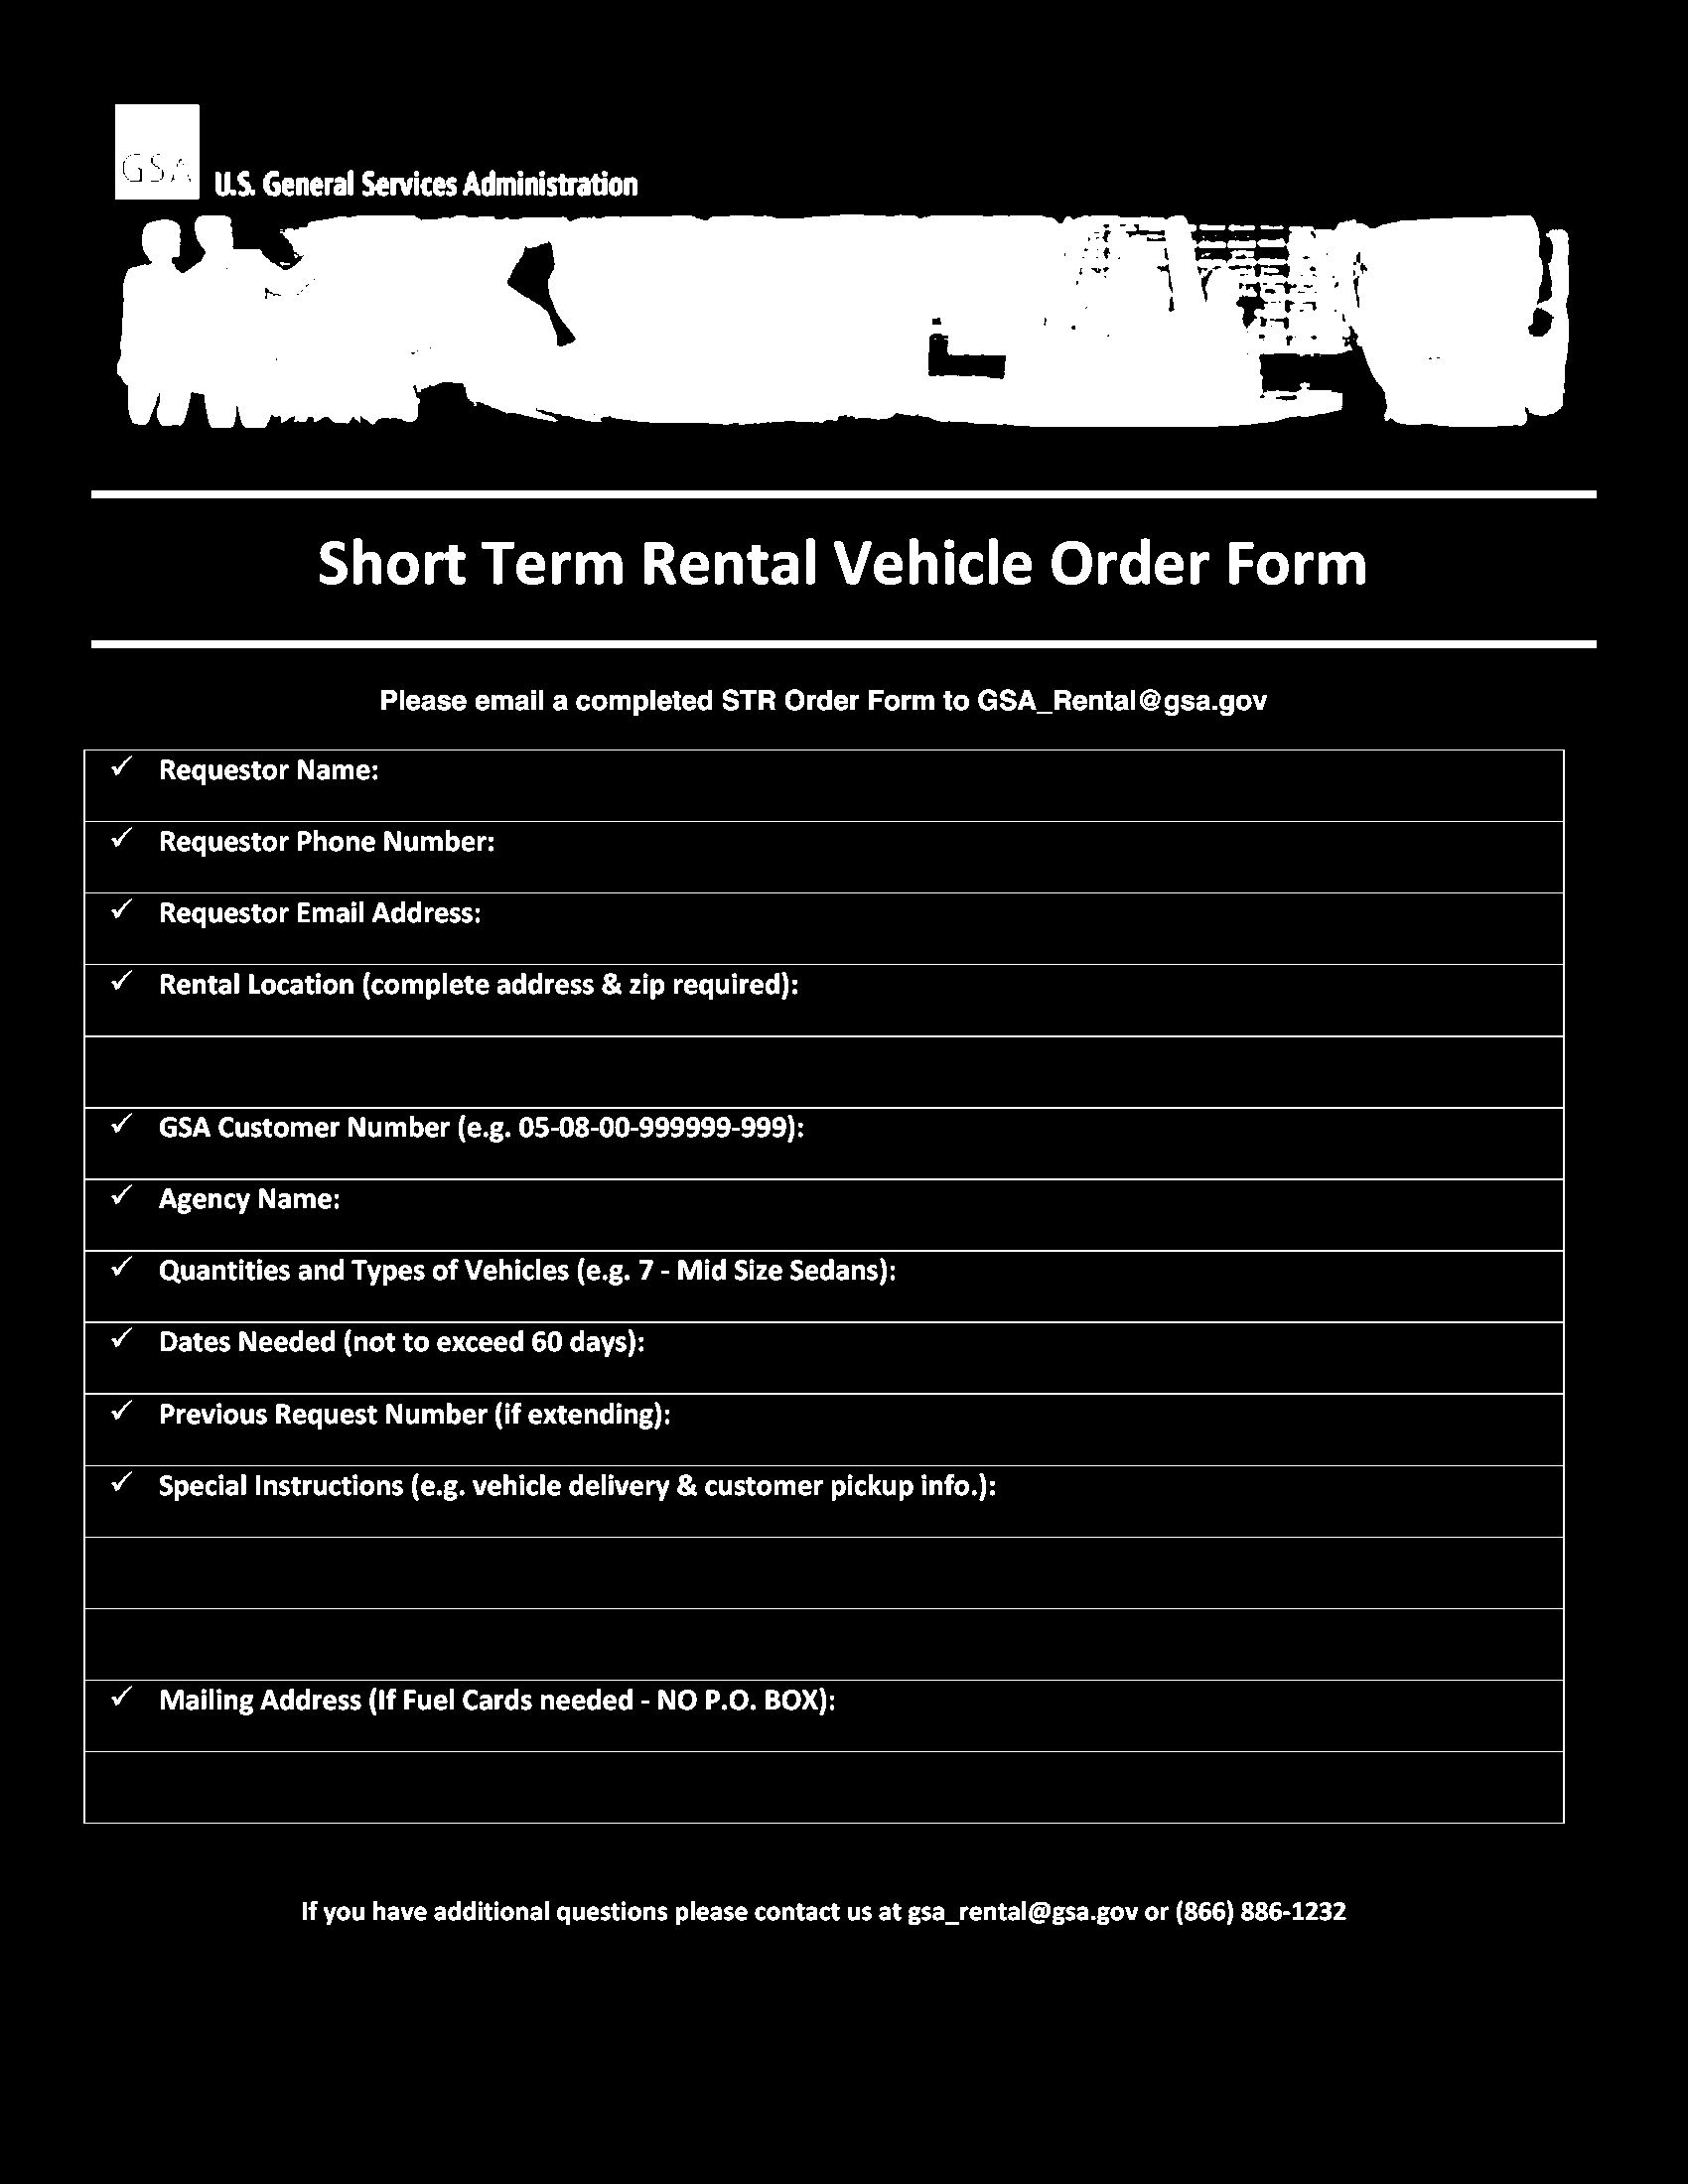

In [9]:
(thresh, blackAndWhiteImage) = cv2.threshold(imgray, 230, 255, cv2.THRESH_BINARY_INV) # Gray to black and white
cv2_imshow(blackAndWhiteImage)

In [10]:
blackAndWhiteImage

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
### selecting min size as 25 pixels
line_min_width = 25
kernal_h = np.ones((1,line_min_width), np.uint8)
kernal_v = np.ones((line_min_width,1), np.uint8)


In [12]:
print(kernal_h)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


In [13]:
print(kernal_v)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


morphologyEx(). Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. It is the difference between dilation and erosion of an image.

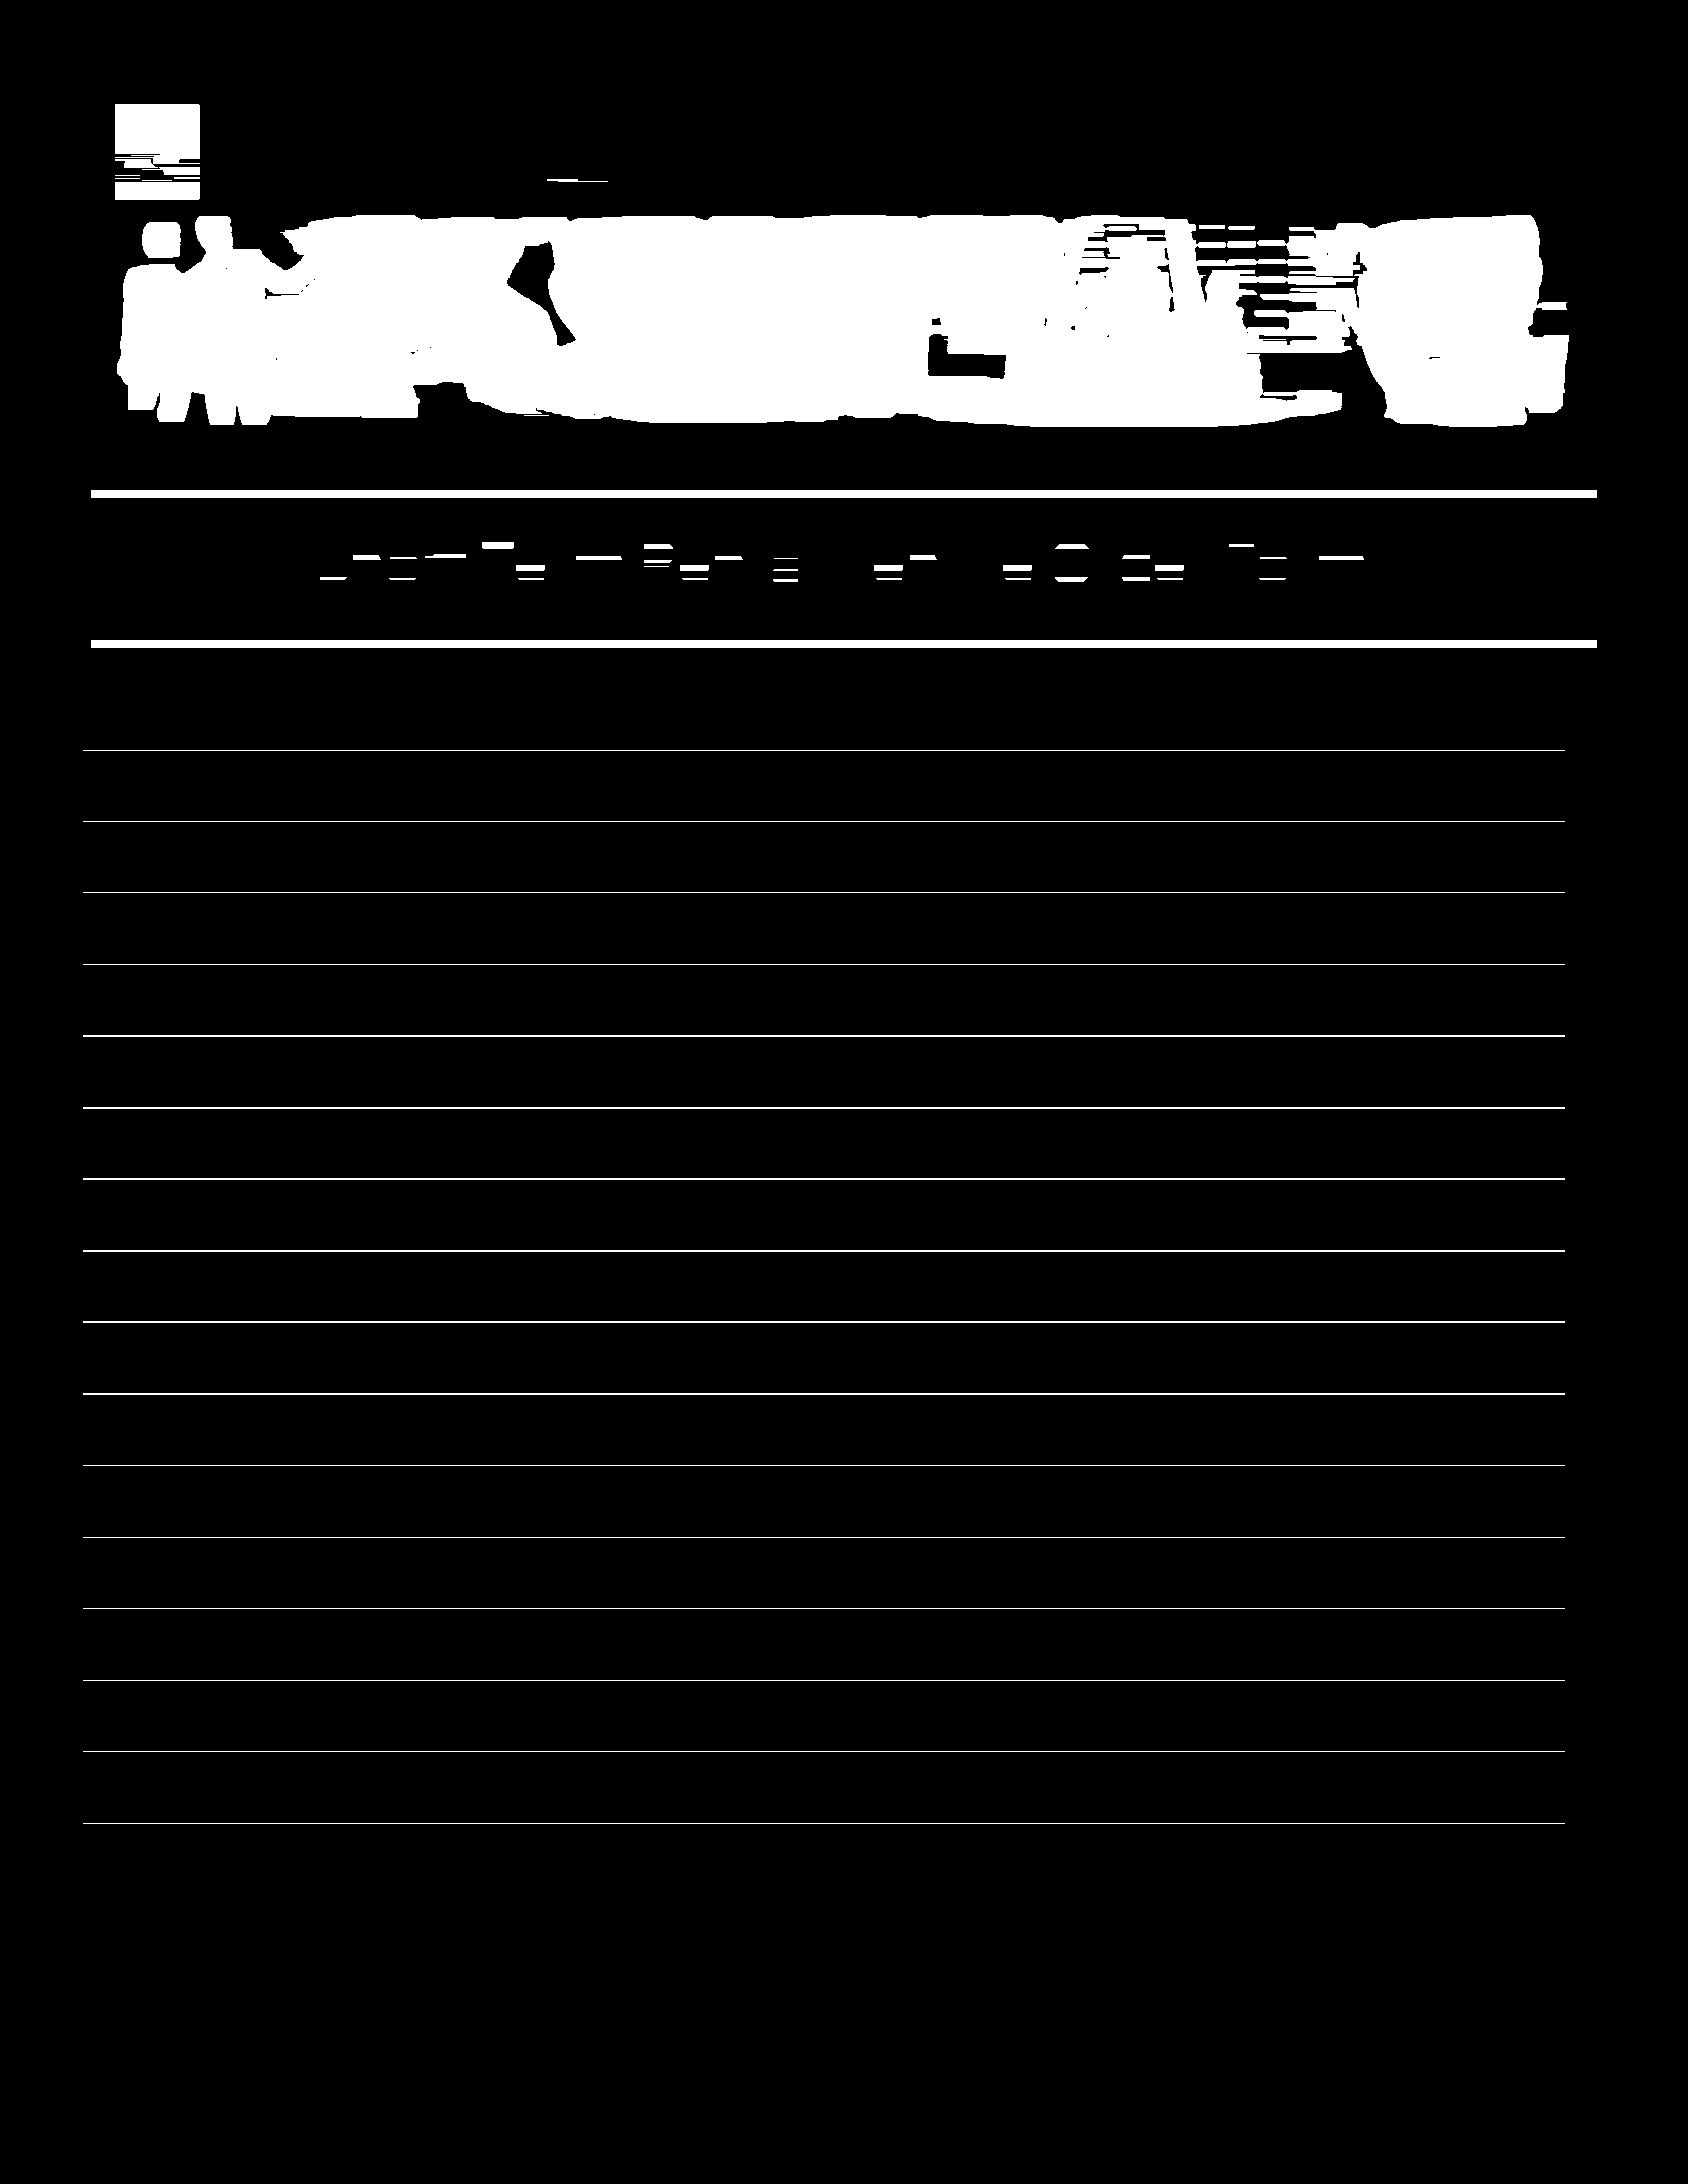

In [14]:
img_bin_h = cv2.morphologyEx(blackAndWhiteImage, cv2.MORPH_OPEN, kernal_h)
cv2_imshow(img_bin_h)

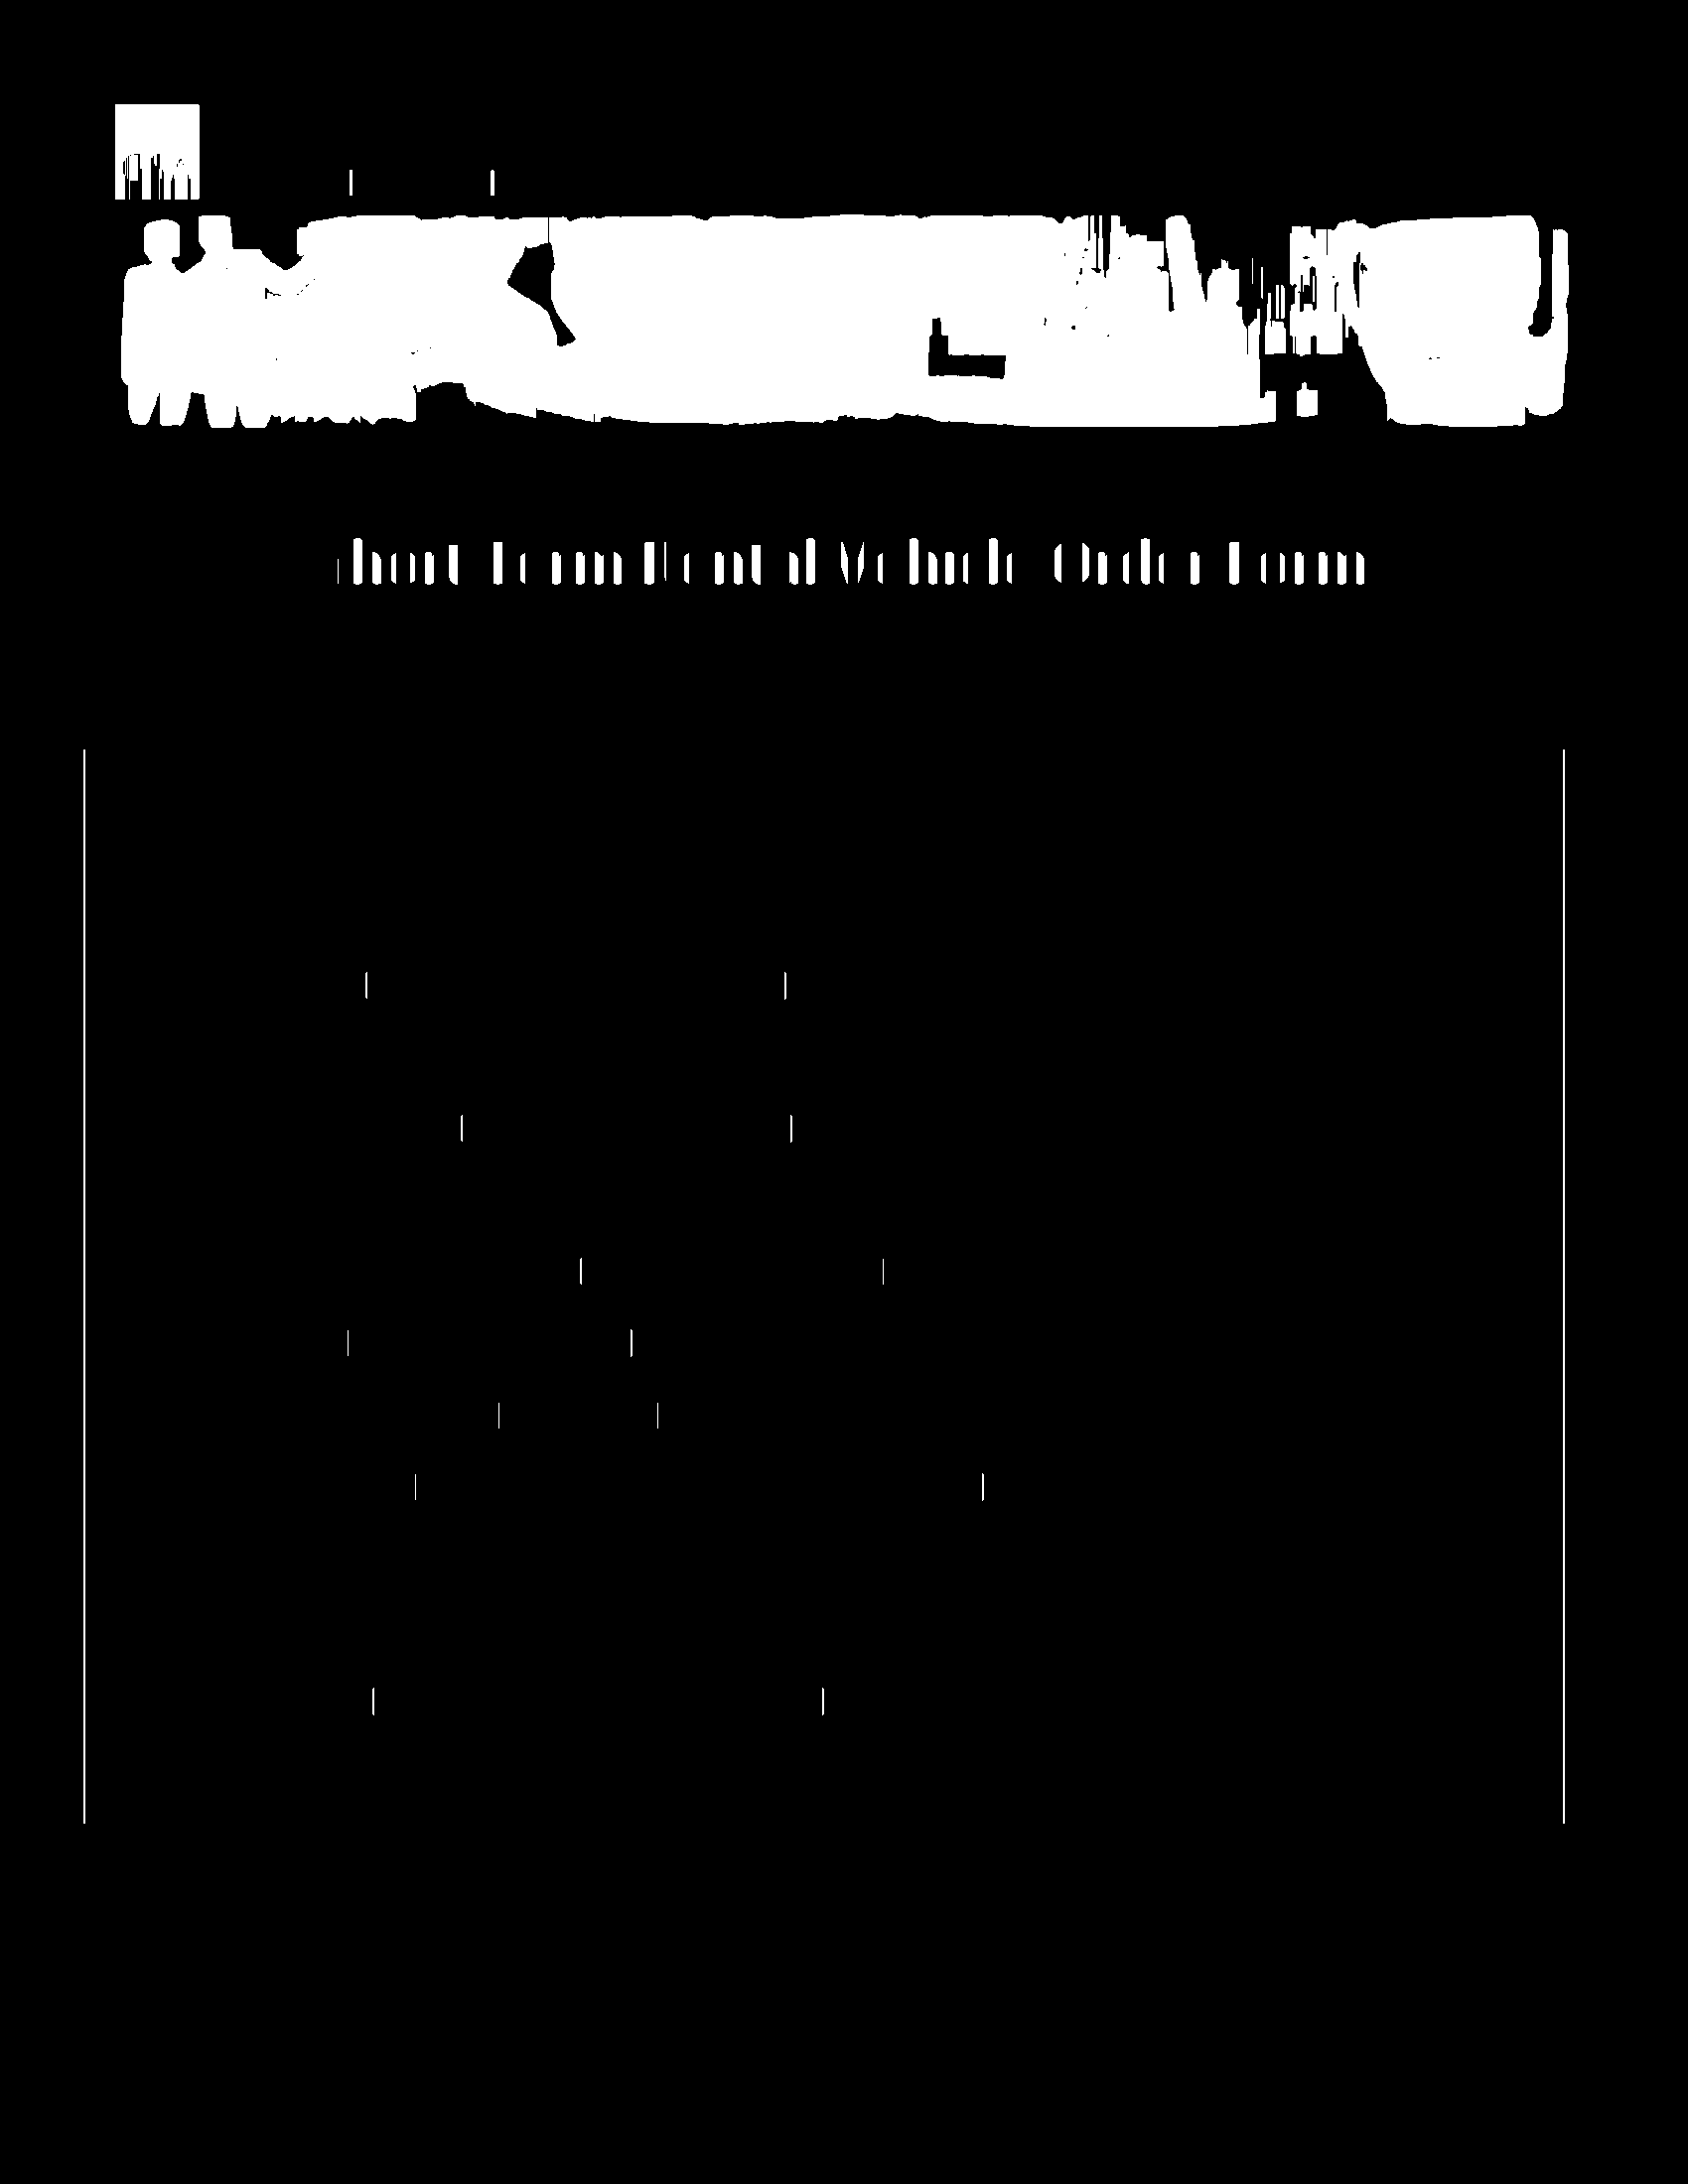

In [15]:
img_bin_v = cv2.morphologyEx(blackAndWhiteImage, cv2.MORPH_OPEN, kernal_v)
cv2_imshow(img_bin_v)

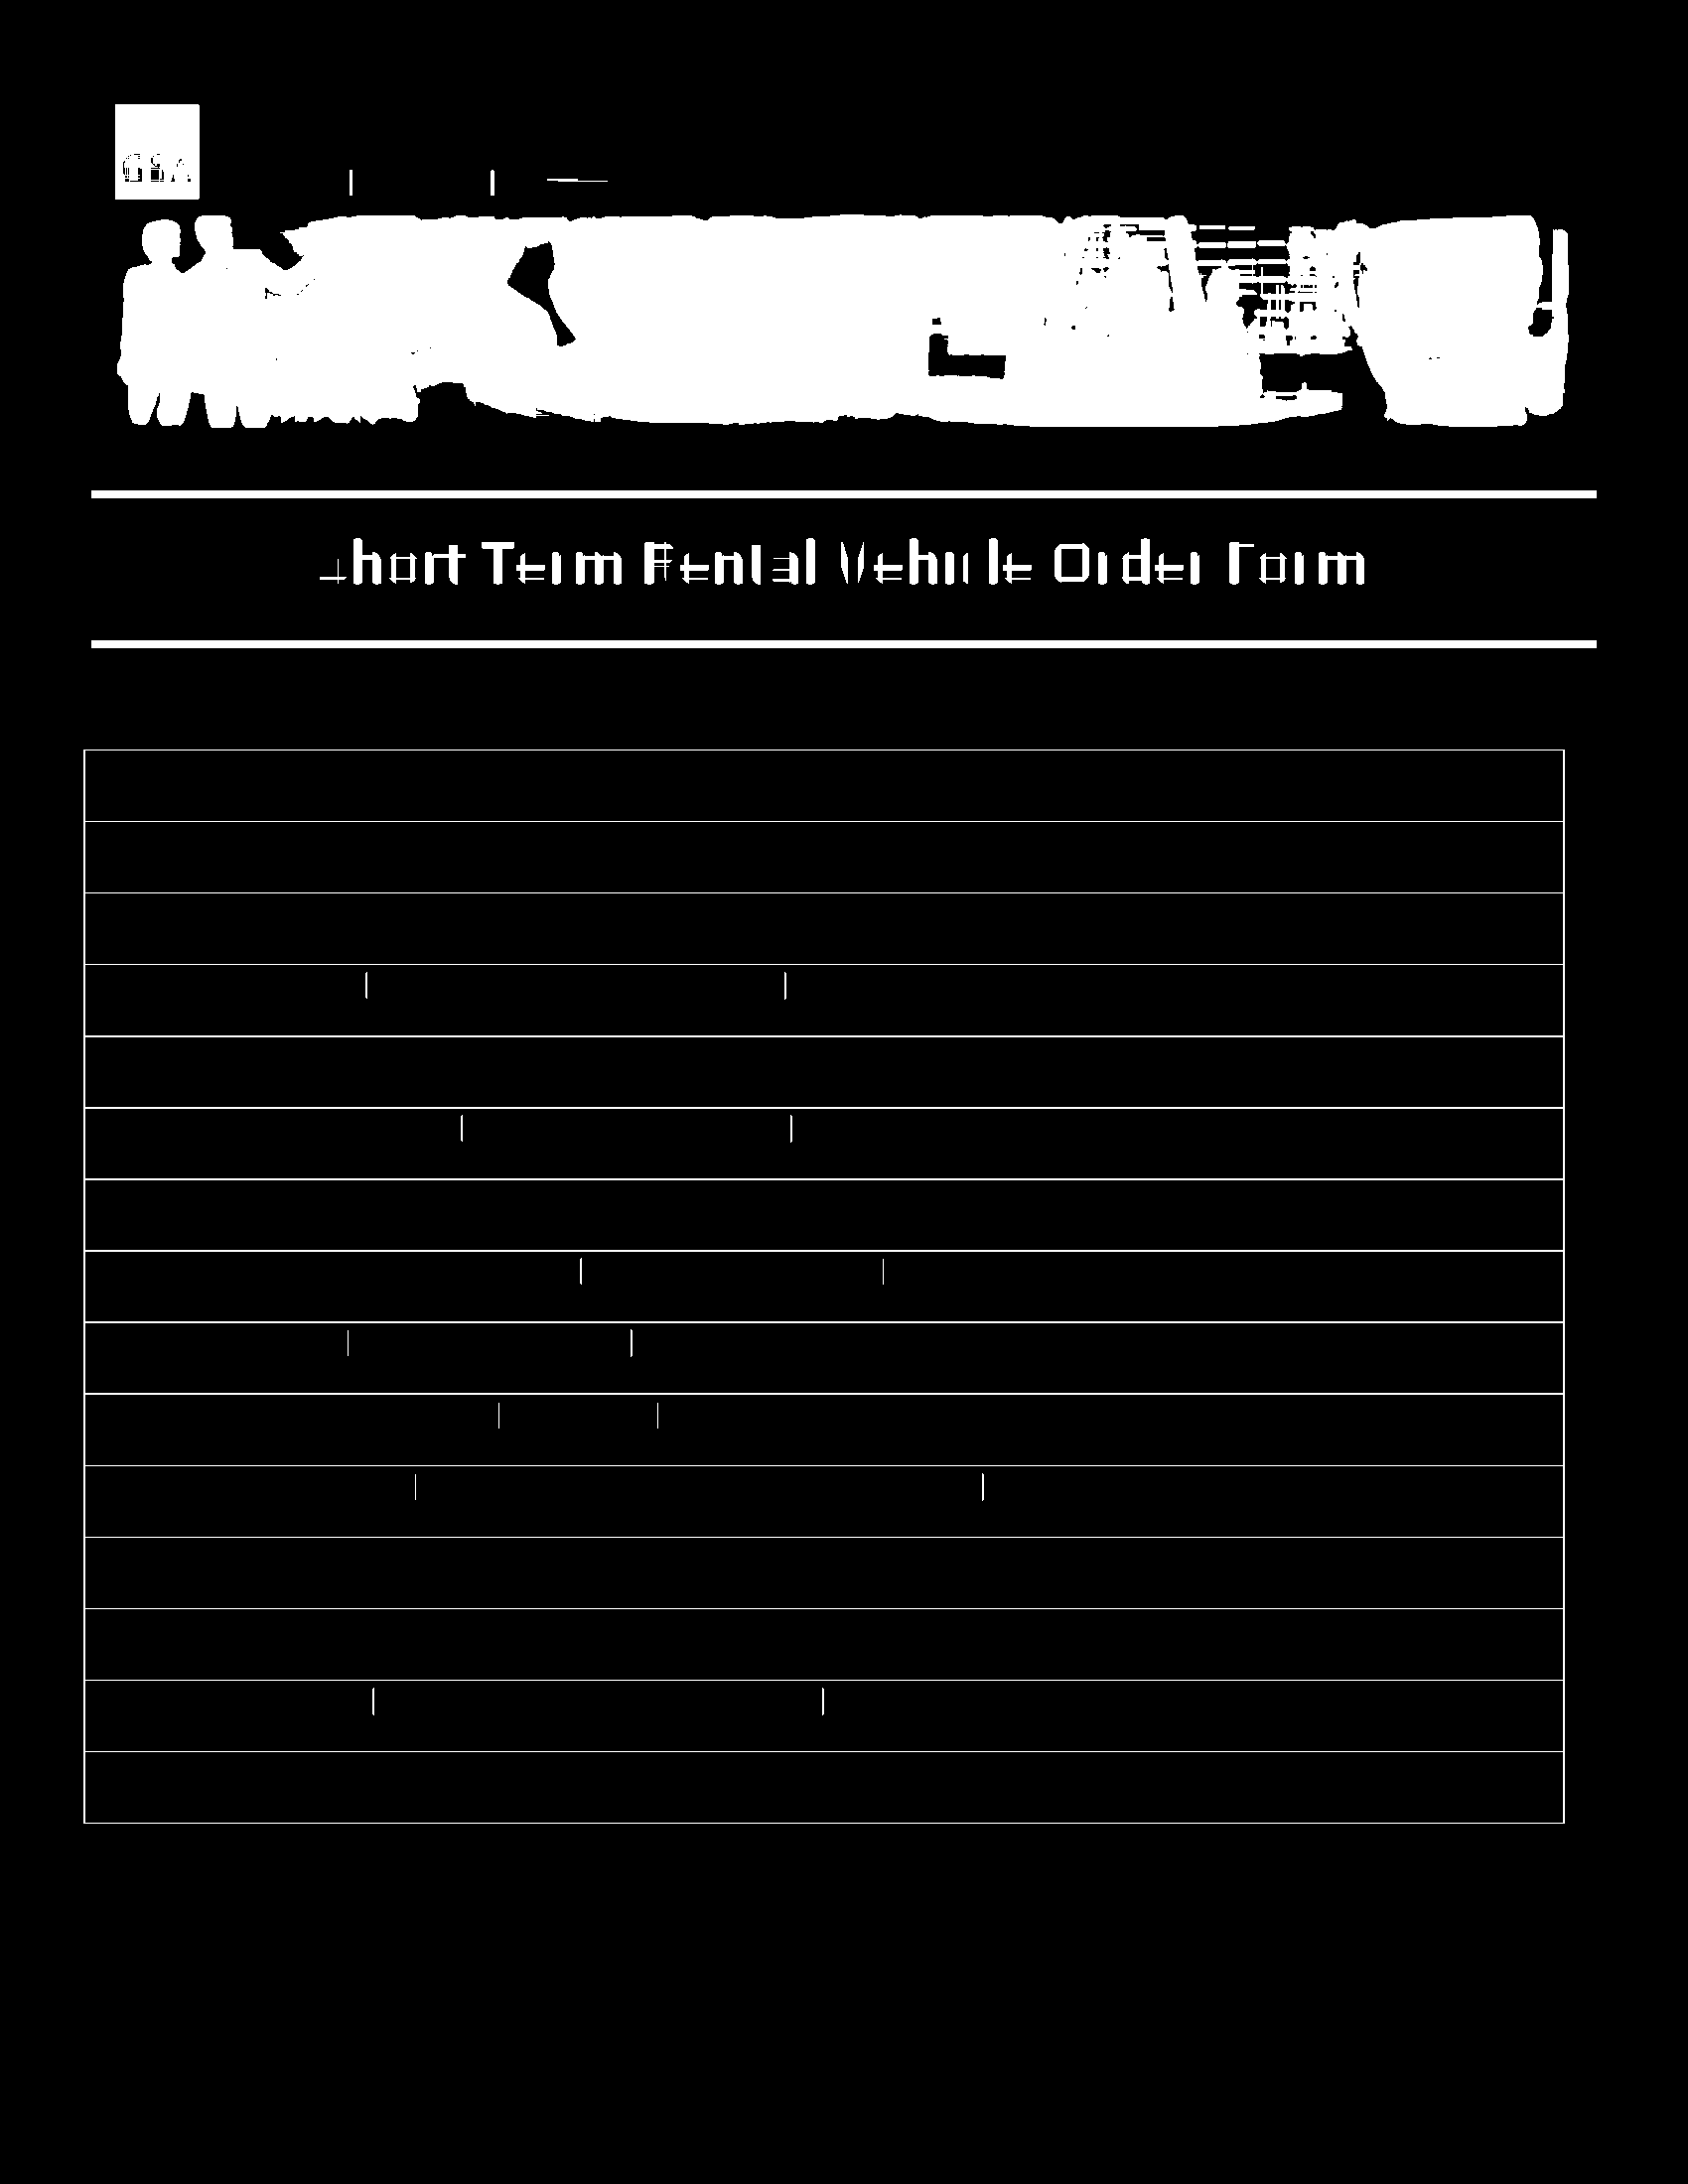

In [16]:
img_bin_final=img_bin_h|img_bin_v #logical OR to combine above two function
cv2_imshow(img_bin_final)

To apply a morphological filter to images in Python using OpenCV, use the cv2 dilate() method. The dilate() method takes two inputs in which one is our input image; the second is called the structuring element or kernel, which decides the nature of the operation.



The most popular method is cv2. connectedComponentsWithStats which returns the following information: The bounding box of the connected component. The area (in pixels) of the component. The centroid/center (x, y)-coordinates of the component.

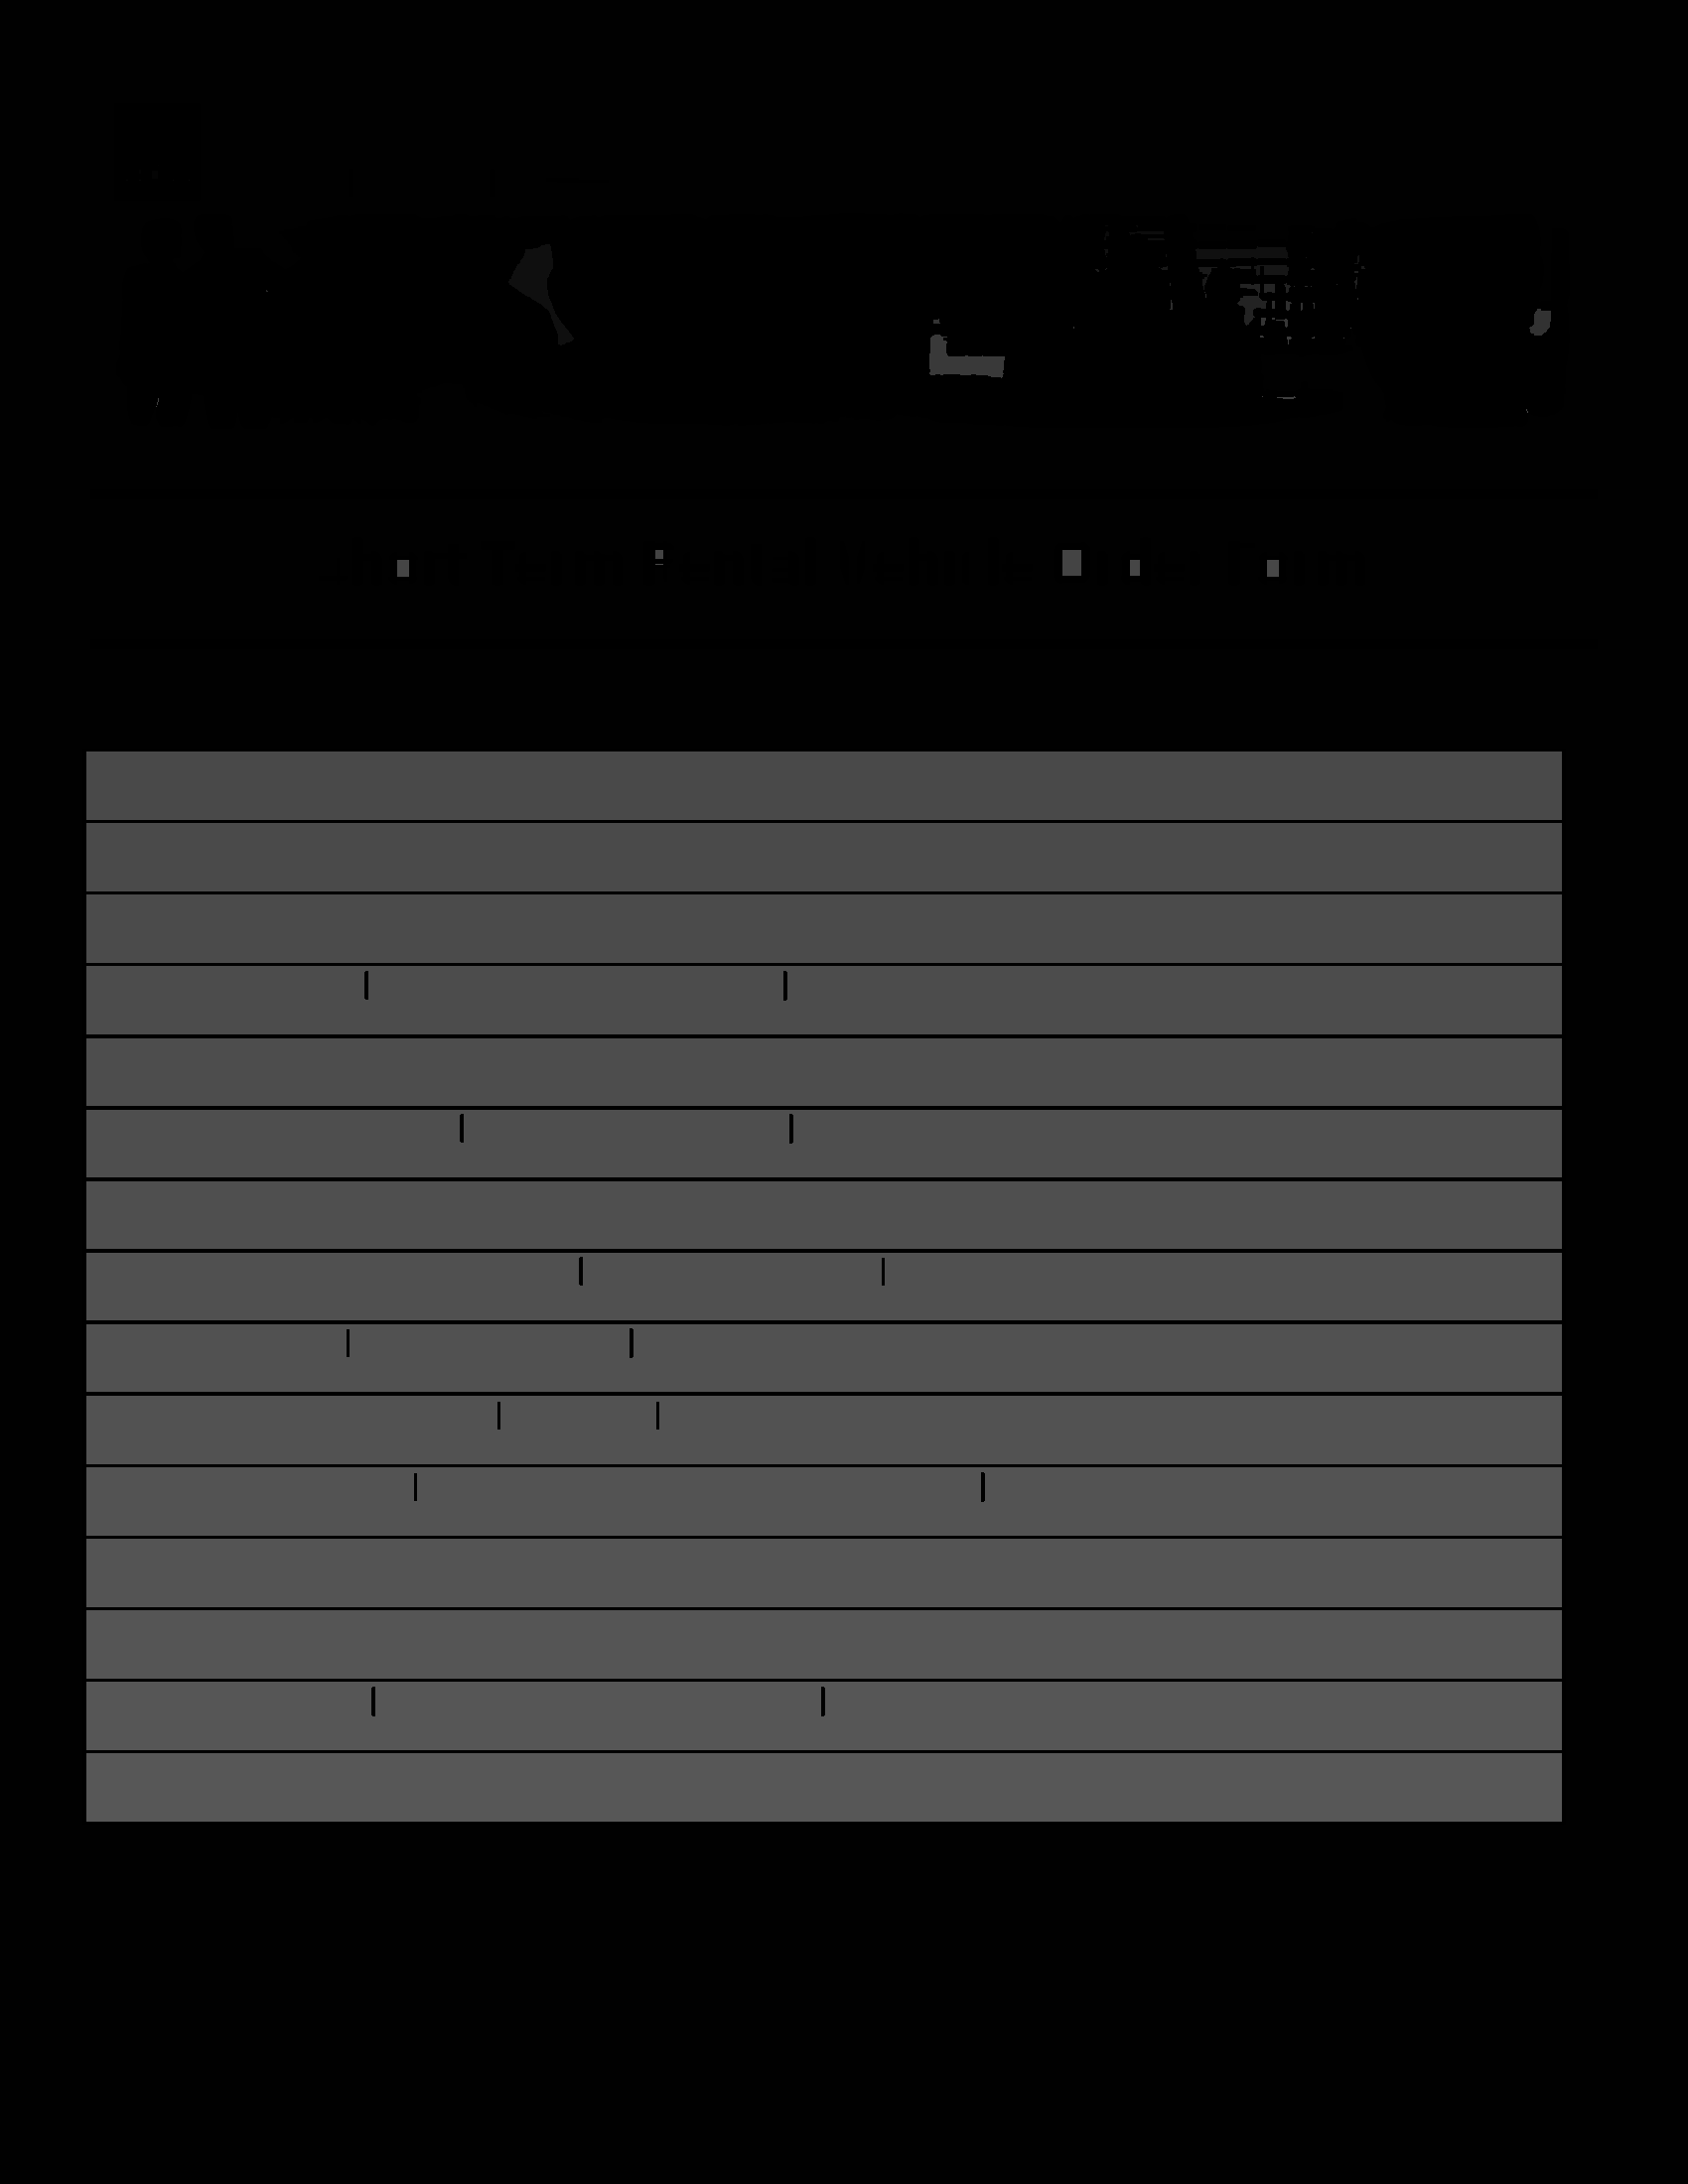

In [17]:
final_kernel=np.ones((3,3), np.uint8)
img_bin_final=cv2.dilate(img_bin_final,final_kernel,iterations=1)

_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

cv2_imshow(labels)

In [18]:
print(stats)

[[     83     104    1526    1734  428255]
 [      0       0    1700    2200 1774496]
 [    159     166       1       1       1]
 [    140     171       2       4       8]
 [    153     172       6       8      48]
 [    127     181       2       1       2]
 [    140     181       2       1       2]
 [    174     181       1       1       1]
 [    190     181       1       1       1]
 [   1113     227       3       1       3]
 [   1144     227       2       2       3]
 [   1112     233       5       9      24]
 [   1137     233      35       4      91]
 [   1321     234       1       1       1]
 [   1156     240      17       2      33]
 [    512     246      66     102    2153]
 [   1204     248      94      14     919]
 [   1112     251       4       6      15]
 [   1174     256       1       3       3]
 [   1364     257       5       9      18]
 [   1114     258       1       1       1]
 [   1315     259       1       1       1]
 [   1263     267      35      11     294]
 [   1167  

In [19]:
for x,y,w,h,area in stats:   
    cv2.rectangle(numpy_image,(x,y),(x+w,y+h),(0,255,0),2)

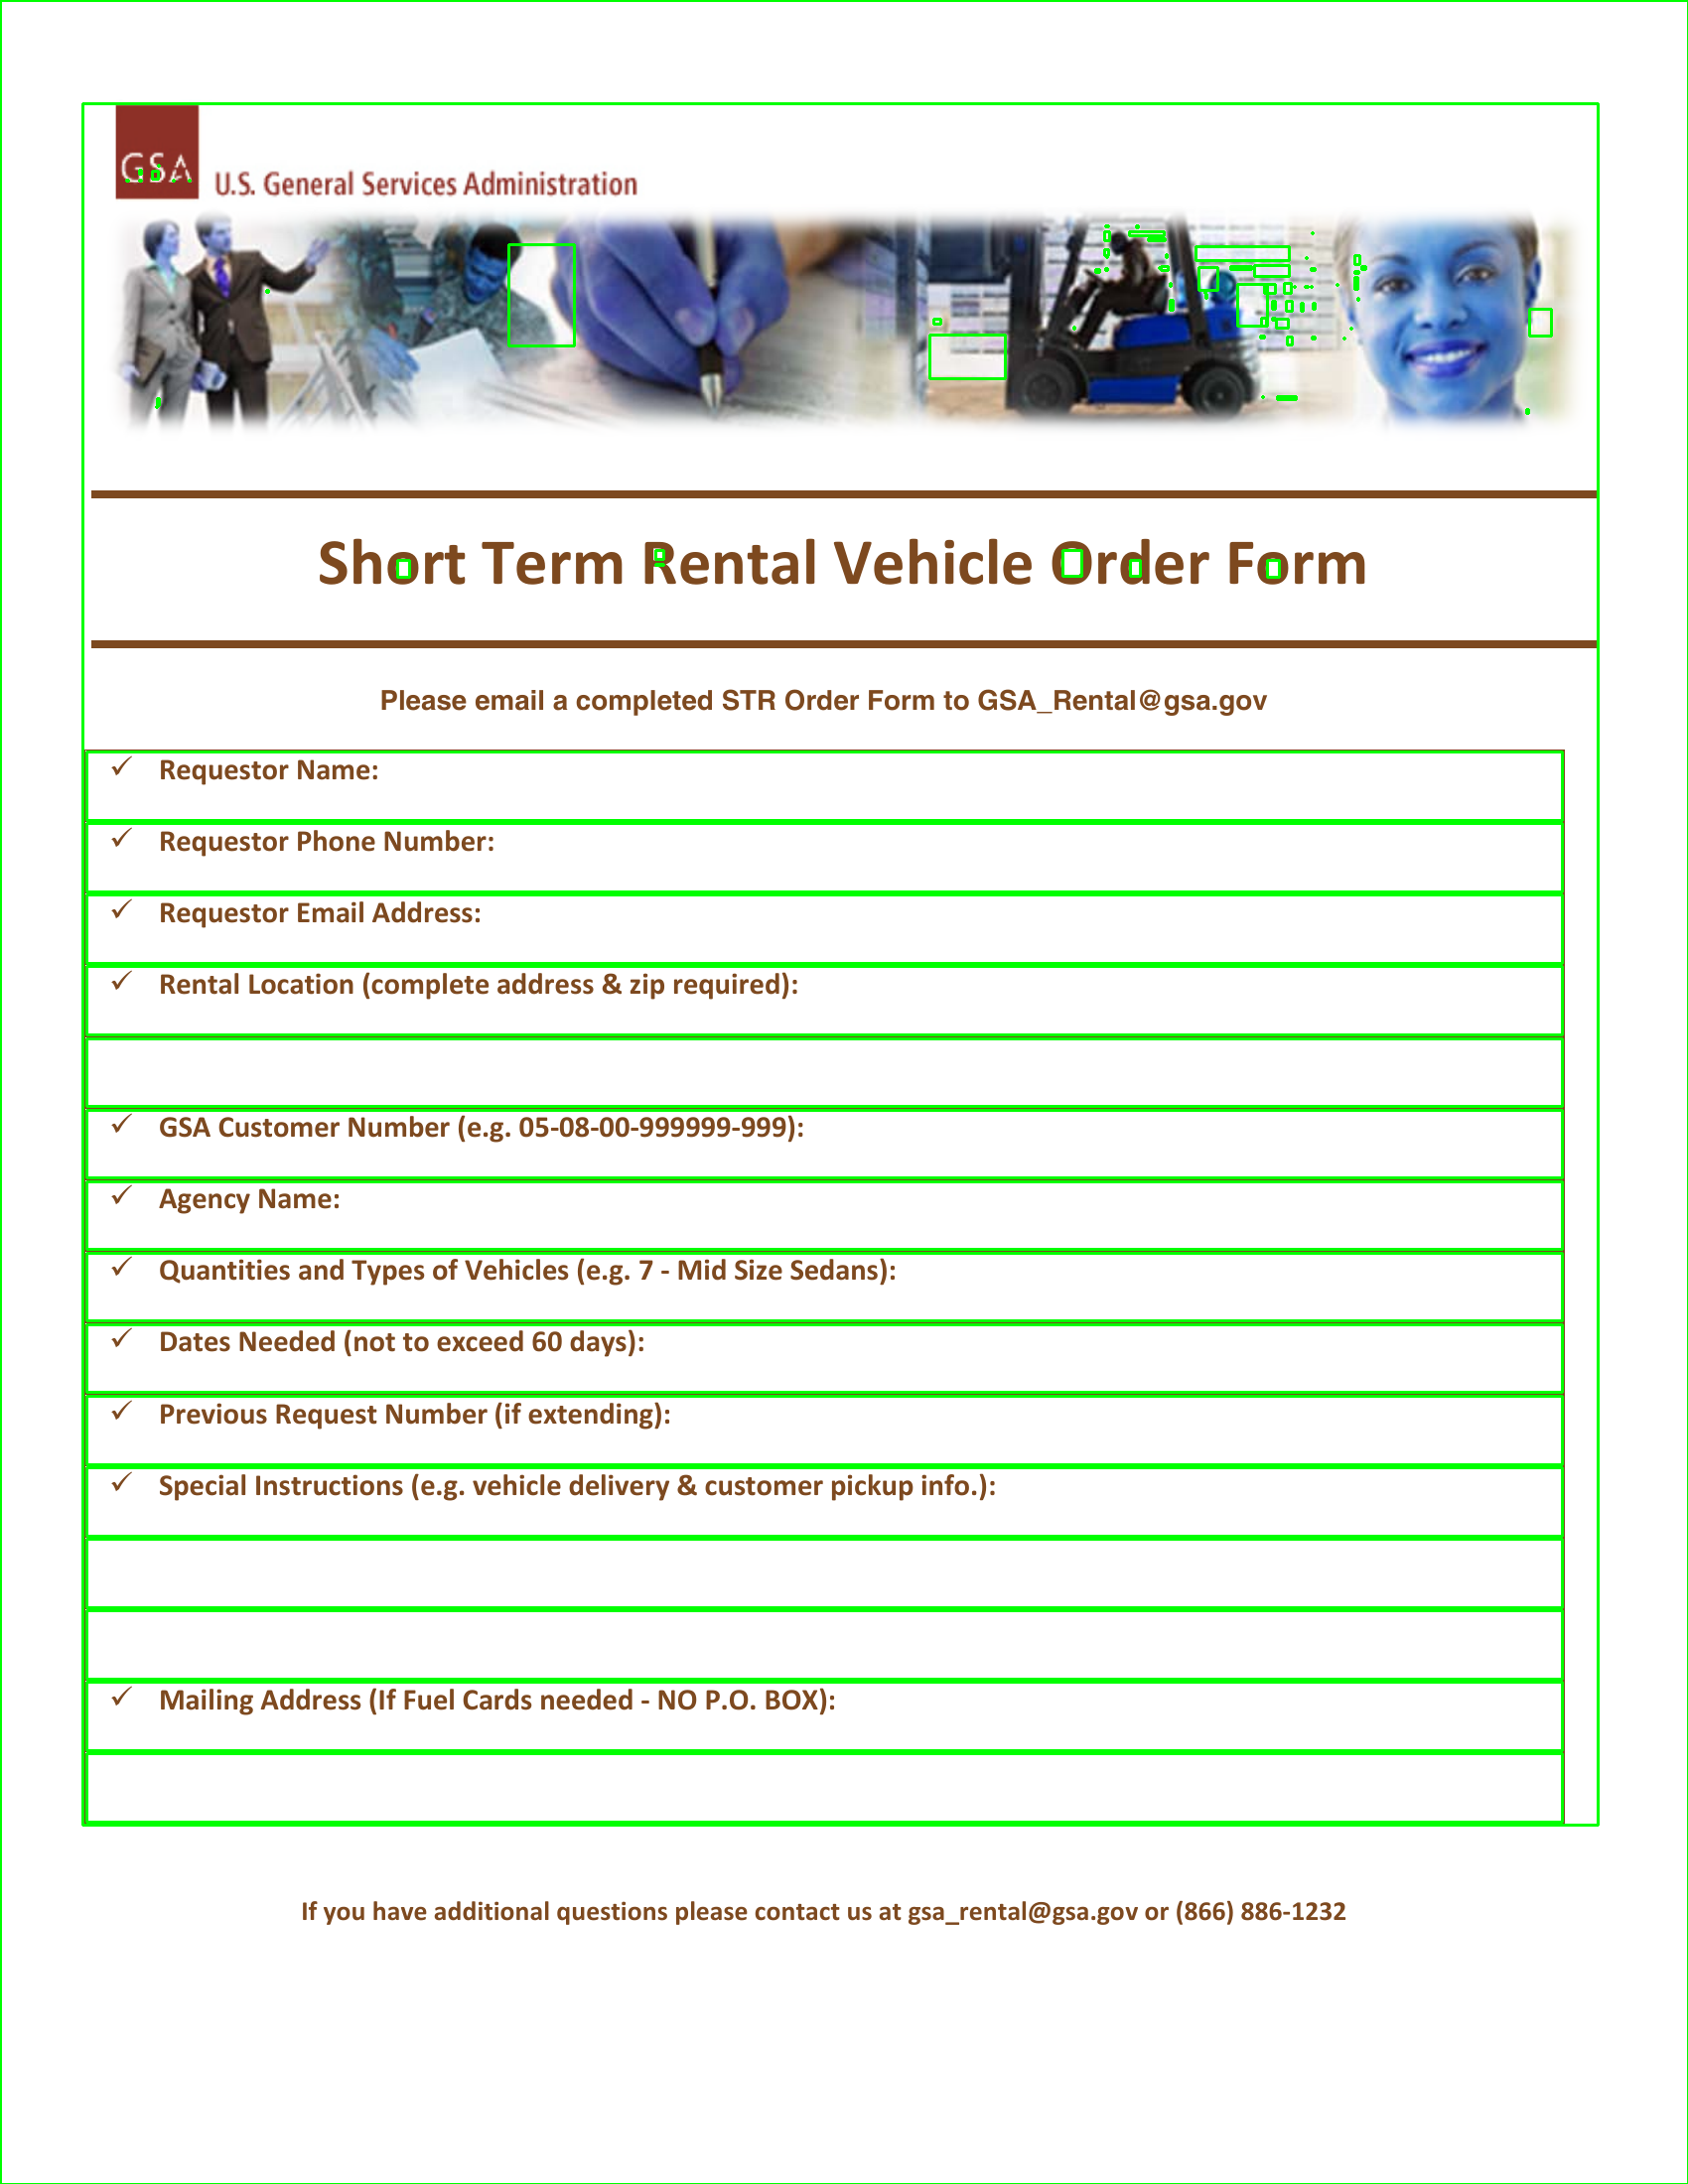

In [20]:
cv2_imshow(numpy_image)

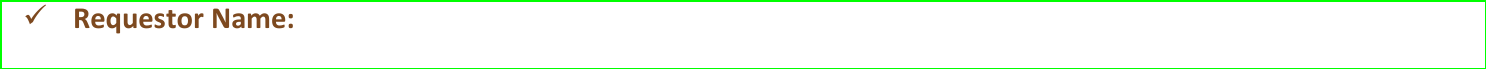

In [21]:
x,y,w,h,a = stats[73]   #jst print the index
c = numpy_image[y:y+h, x:x+w]
cv2_imshow(c)

index of the cropped image is  73


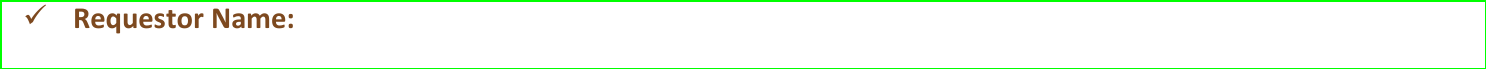

index of the cropped image is  74


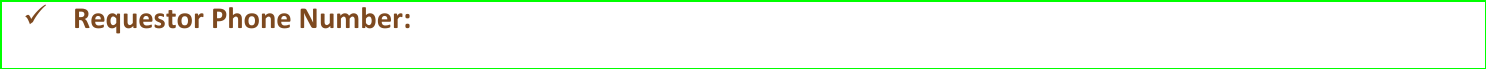

index of the cropped image is  75


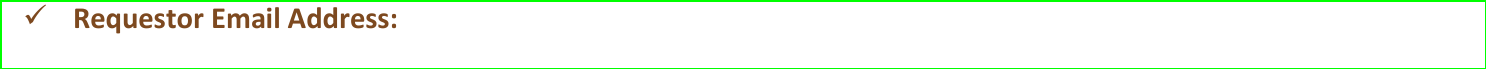

index of the cropped image is  76


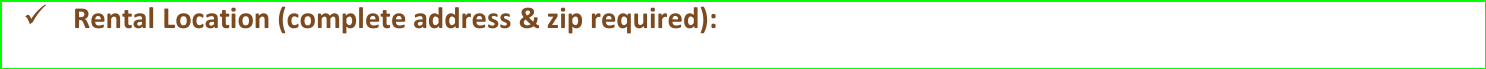

index of the cropped image is  77


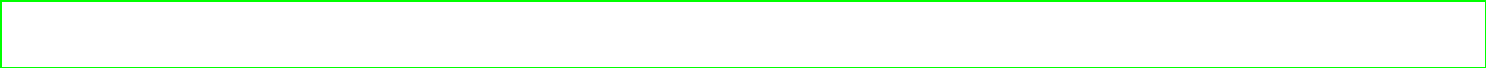

index of the cropped image is  78


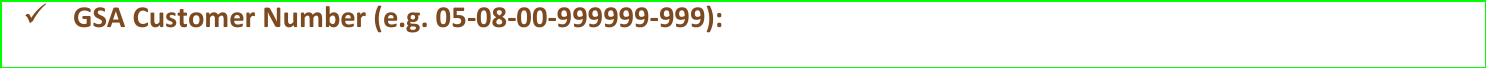

index of the cropped image is  79


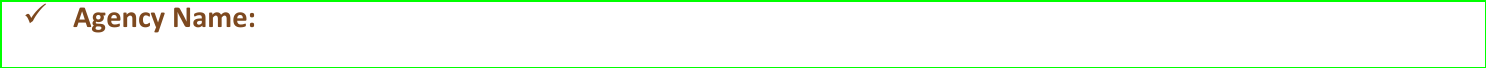

index of the cropped image is  80


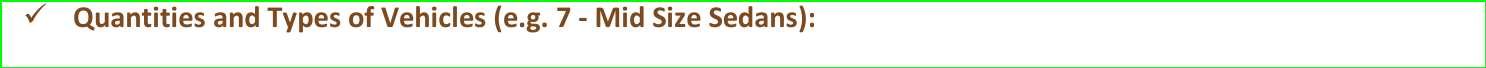

index of the cropped image is  81


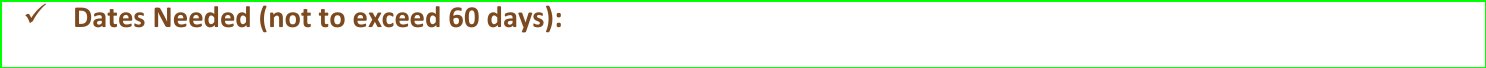

index of the cropped image is  82


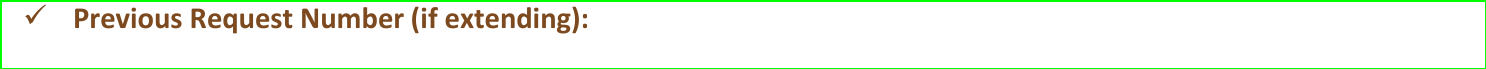

index of the cropped image is  83


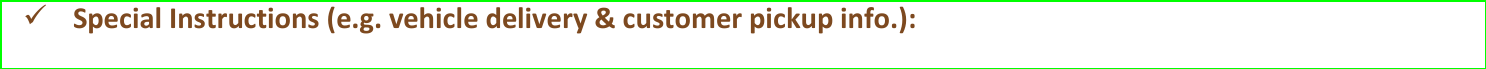

index of the cropped image is  84


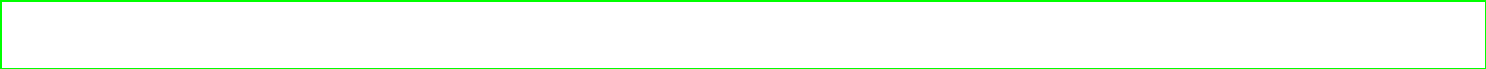

index of the cropped image is  85


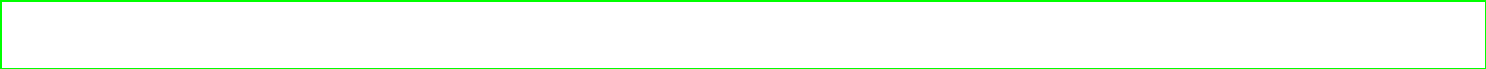

index of the cropped image is  86


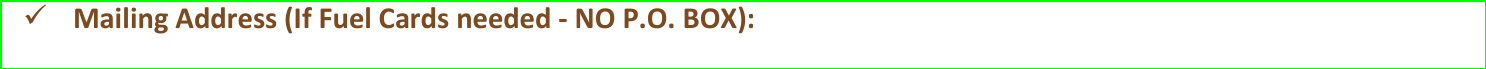

index of the cropped image is  87


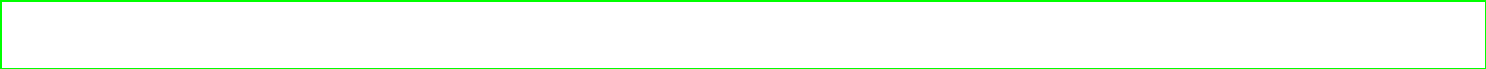

In [22]:
count = 72
for x,y,w,h,area in stats[73:]:
  print("index of the cropped image is ",count + 1 )
  count = count + 1 
  cv2_imshow(numpy_image[y:y+h, x:x+w])

In [23]:
from pytesseract import image_to_string 
import re      #Regex help to remove unnecessary  symbols

In [24]:
#Creat list of information from above image
remove_data=['Requestor Name','Requestor Phone number','Requestor email Address','Rental location','GSA Customer Number','Agency name','Quantitys and Type of Vehicles','Date needes','Previous request number','Special instruction','mailing address']
data ={          #Creat dictionary with key and value with above index
    'Requestor Name':73,
    'Requestor Phone number':74,
    'Requestor email Address':75,
    'Rental location':76,
    'GSA Customer Number':78,
    'Agency name':79,
    'Quantitys and Type of Vehicles':80,
    'Date needes':81, 
    'Previous request number':82,
    'Special instruction':83,
    'mailing address':86
       }
dic = {}
for key, value in data.items(): #For loop in dictionary with data.items function
    x,y,w,h,a = stats[value]
    c = numpy_image[y:y+h, x:x+w]
    txt = image_to_string(c, lang='eng')
    txt = re.sub("\n|\x0c|'|vY|Y|\W" ," ",txt) ##Regex help to remove unnecessary  symbols
    for i in remove_data:
     txt = re.sub(i, '', txt)
    dic[key] = txt
dic

{'Agency name': '      v Agency Name         ',
 'Date needes': '        Dates Needed  not to exceed 60 days          ',
 'GSA Customer Number': '      v   e g  05 08 00 999999 999          ',
 'Previous request number': '        Previous Request Number  if extending          ',
 'Quantitys and Type of Vehicles': '        Quantities and Types of Vehicles  e g  7   Mid Size Sedans          ',
 'Rental location': '        Rental Location  complete address   zip required          ',
 'Requestor Name': '                 ',
 'Requestor Phone number': '        Requestor Phone Number         ',
 'Requestor email Address': '        Requestor Email Address         ',
 'Special instruction': '        Special Instructions  e g  vehicle delivery   customer pickup info           ',
 'mailing address': '        Mailing Address  If Fuel Cards needed   NO P O  BOX          '}

In [27]:
dic

{'Agency name': '      v Agency Name         ',
 'Date needes': '        Dates Needed  not to exceed 60 days          ',
 'GSA Customer Number': '      v   e g  05 08 00 999999 999          ',
 'Previous request number': '        Previous Request Number  if extending          ',
 'Quantitys and Type of Vehicles': '        Quantities and Types of Vehicles  e g  7   Mid Size Sedans          ',
 'Rental location': '        Rental Location  complete address   zip required          ',
 'Requestor Name': '                 ',
 'Requestor Phone number': '        Requestor Phone Number         ',
 'Requestor email Address': '        Requestor Email Address         ',
 'Special instruction': '        Special Instructions  e g  vehicle delivery   customer pickup info           ',
 'mailing address': '        Mailing Address  If Fuel Cards needed   NO P O  BOX          '}

Next step is to creat FastAPI and make Docker image
